In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Observation
1.Above is our dataset which contains information about attributes which are responsible rainfall.

2.There are 8425 rows and 23 columns in our dataset.

3.Here,we have to predict 2 things i.e whwther it will rain tomorrow and howmuch it will rain.

so we will create model one at a time

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Observation
1.From here we can see that some columns have dtype as object and some have dtype float.

2.There are nulls in our data which we will fix later.

3.First i m taking my target variable as 'RainTomorrow' and rest all are features.

4.Our target variable have 2 categories so it is our binaryclassification problem.

5.Here dtype of date is object,let's change it to datetime format 


In [5]:
#changing dtype of date
df['Date']=pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

In [6]:
df['Date'].nunique()

3004

In [7]:
#let's drop duplicates
df.drop_duplicates(inplace=True)
df.shape


(6762, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6762 non-null   datetime64[ns]
 1   Location       6762 non-null   object        
 2   MinTemp        6692 non-null   float64       
 3   MaxTemp        6705 non-null   float64       
 4   Rainfall       6624 non-null   float64       
 5   Evaporation    3841 non-null   float64       
 6   Sunshine       3526 non-null   float64       
 7   WindGustDir    5820 non-null   object        
 8   WindGustSpeed  5820 non-null   float64       
 9   WindDir9am     5968 non-null   object        
 10  WindDir3pm     6468 non-null   object        
 11  WindSpeed9am   6699 non-null   float64       
 12  WindSpeed3pm   6662 non-null   float64       
 13  Humidity9am    6708 non-null   float64       
 14  Humidity3pm    6666 non-null   float64       
 15  Pressure9am    5454 n

# Observation
Now,after removing duplicates we have 6762 rows and 23 columns

In [9]:
#fetching date ,month,year separately from date column
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6762 non-null   datetime64[ns]
 1   Location       6762 non-null   object        
 2   MinTemp        6692 non-null   float64       
 3   MaxTemp        6705 non-null   float64       
 4   Rainfall       6624 non-null   float64       
 5   Evaporation    3841 non-null   float64       
 6   Sunshine       3526 non-null   float64       
 7   WindGustDir    5820 non-null   object        
 8   WindGustSpeed  5820 non-null   float64       
 9   WindDir9am     5968 non-null   object        
 10  WindDir3pm     6468 non-null   object        
 11  WindSpeed9am   6699 non-null   float64       
 12  WindSpeed3pm   6662 non-null   float64       
 13  Humidity9am    6708 non-null   float64       
 14  Humidity3pm    6666 non-null   float64       
 15  Pressure9am    5454 n

In [10]:
df.drop('Date',axis=1,inplace=True)
df.shape

(6762, 25)

In [11]:
#let's check value counts for each column
for col in df:
    print('Value count of ',[col] ,df[col].value_counts())
    /n:

Value count of  ['Location'] PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
Value count of  ['MinTemp'] 13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64
Value count of  ['MaxTemp'] 19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
Value count of  ['Rainfall'] 0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: Rainfall, Length: 250, dtype: int64
Value count of  ['Evaporation'] 4.0      141
3.0      125
2.2      118
2.4      116
2

# Observation
After calculating valuecounts i can see that

1.Location,WindGustDir,Winddir9am,WindDir3pm,RainToday are catg columns and have dtype as object.

2.Cloud9am,Cloud3pm, are also catg column and dtype is float where as Month,year,day also are catg columns and dtype is int

3.Rest all columns are continous

In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,Year
count,6692.000000,6705.000000,6624.000000,3841.000000,3526.000000,5820.000000,6699.000000,6662.000000,6708.000000,6666.000000,5454.000000,5451.000000,4896.000000,4860.000000,6711.000000,6670.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,6.462141,15.737208,2012.052203
std,5.569574,6.156128,10.591418,4.436790,3.785883,14.418577,9.833499,9.620043,17.251733,18.631086,6.712043,6.646755,2.908324,2.740519,5.744117,6.012896,3.377471,8.793898,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.500000,0.000000,2.600000,5.400000,30.000000,6.000000,9.000000,56.000000,38.000000,1013.100000,1010.300000,1.000000,1.000000,13.800000,18.300000,4.000000,8.000000,2010.000000
50%,13.200000,23.500000,0.000000,4.600000,9.000000,37.000000,11.000000,17.000000,68.000000,50.000000,1017.600000,1015.100000,5.000000,5.000000,18.000000,22.100000,6.000000,16.000000,2012.000000
75%,17.500000,28.400000,0.800000,7.000000,10.800000,48.000000,19.000000,24.000000,81.000000,63.000000,1022.200000,1019.600000,7.000000,7.000000,22.200000,26.800000,9.000000,23.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,12.000000,31.000000,2017.000000


# Observation
1.Mean is greater than Median for MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm ,it means data is right skewed.

2.There are outliers in some columns.

3.Mean is less than Median for SunShine column it means data is left skewed.

4.There are nulls in our dataset.

Let's first fill nulls

In [13]:
#let's fill null values
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mode()[0])
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0])
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())









In [14]:
df.isna().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow     138
Month              0
Day                0
Year               0
dtype: int64

In [15]:
df['RainTomorrow'].mode()

0    No
Name: RainTomorrow, dtype: object

In [16]:
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   object 
 1   MinTemp        6762 non-null   float64
 2   MaxTemp        6762 non-null   float64
 3   Rainfall       6762 non-null   float64
 4   Evaporation    6762 non-null   float64
 5   Sunshine       6762 non-null   float64
 6   WindGustDir    6762 non-null   object 
 7   WindGustSpeed  6762 non-null   float64
 8   WindDir9am     6762 non-null   object 
 9   WindDir3pm     6762 non-null   object 
 10  WindSpeed9am   6762 non-null   float64
 11  WindSpeed3pm   6762 non-null   float64
 12  Humidity9am    6762 non-null   float64
 13  Humidity3pm    6762 non-null   float64
 14  Pressure9am    6762 non-null   float64
 15  Pressure3pm    6762 non-null   float64
 16  Cloud9am       6762 non-null   float64
 17  Cloud3pm       6762 non-null   float64
 18  Temp9am 

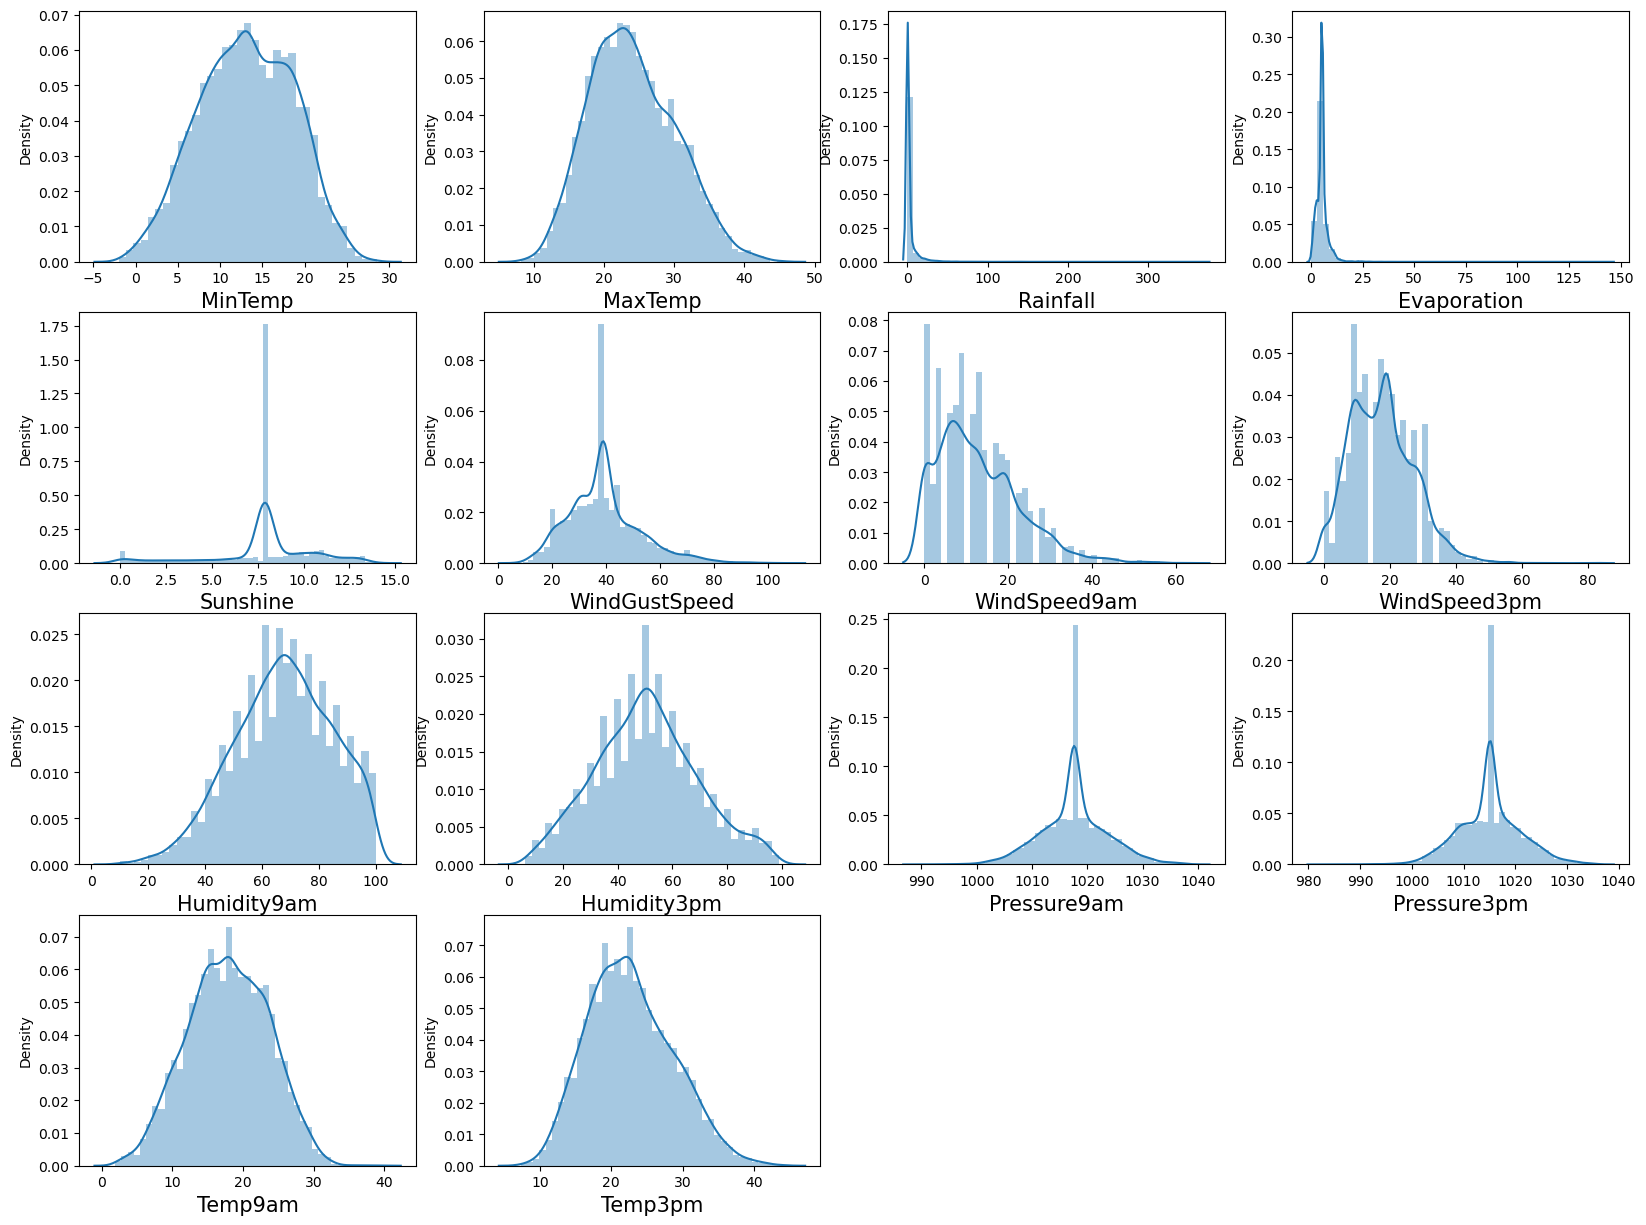

In [18]:
#lets build distplot to check dist for cont columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

# Observation
1.Distribution seems good for MinTemp,MaxTemp,Temp9am,Temp3pm.

2.Whereas we can see outliers in sunshine,Rainfall,evaporation etc

Let's plot boxplot to check outliers

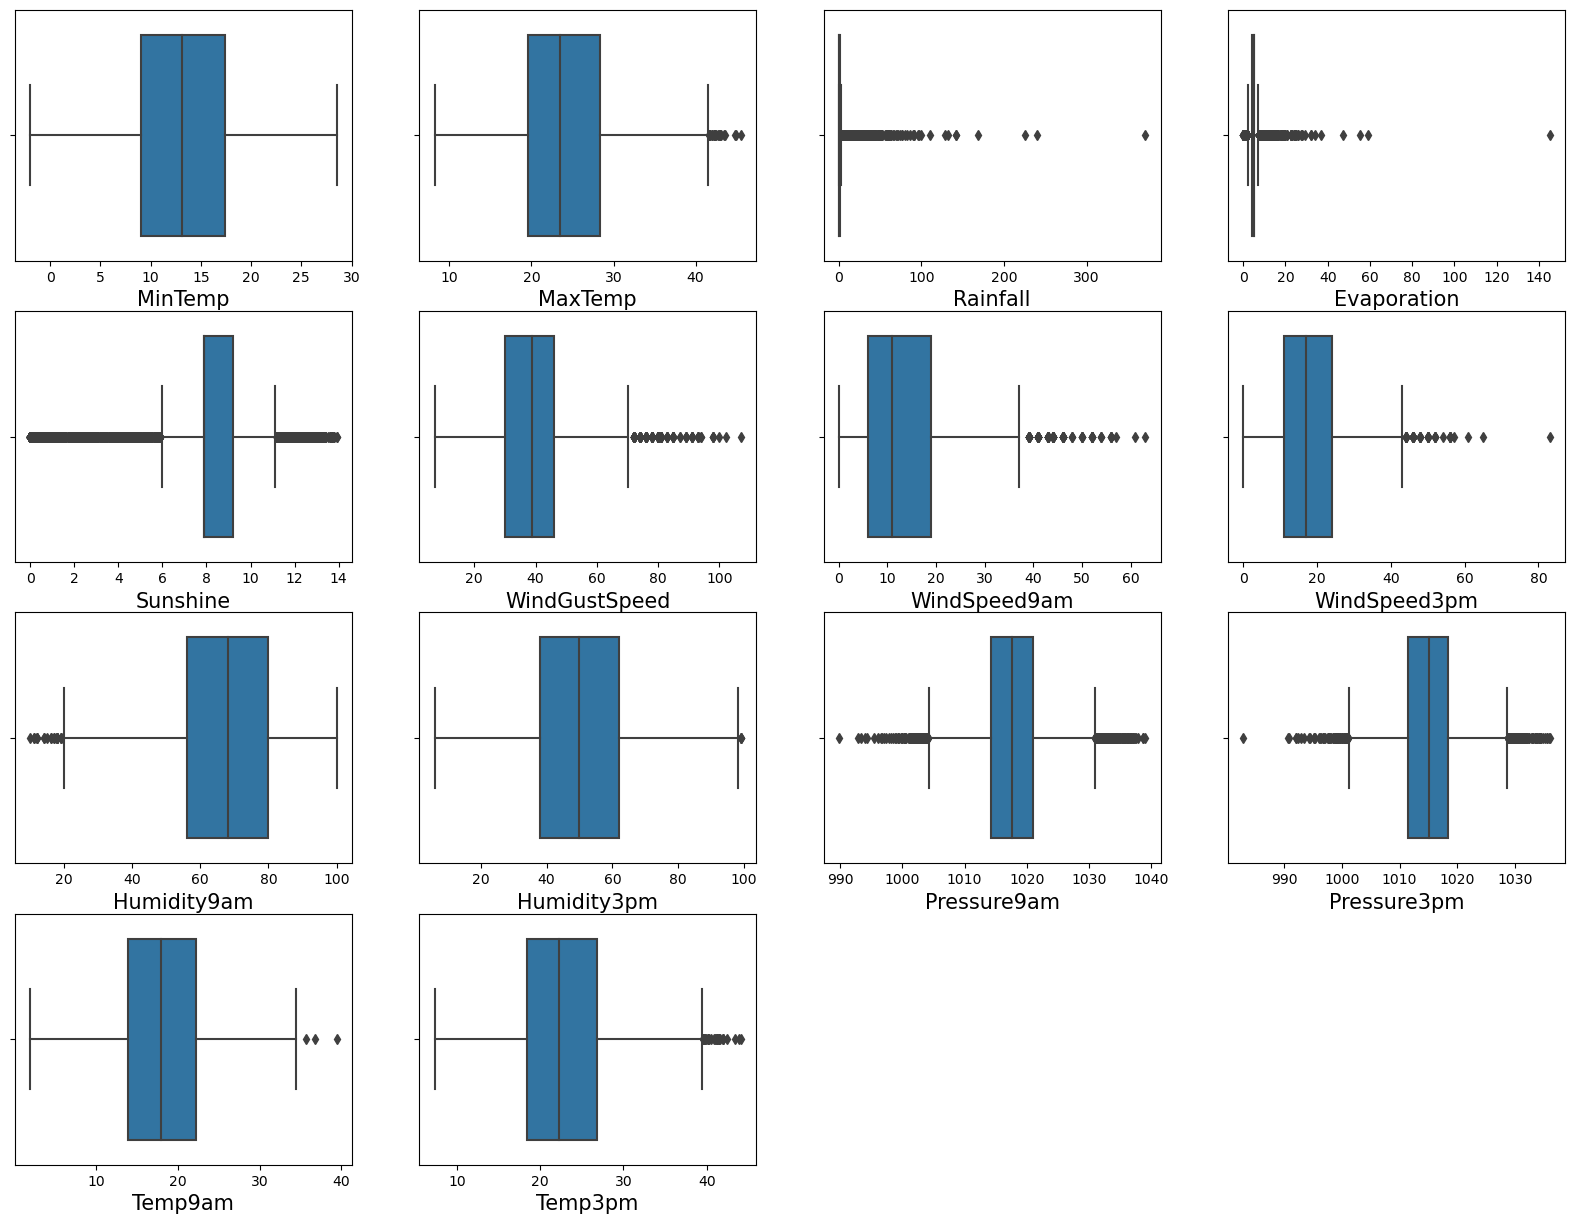

In [19]:
#lets build boxplot to check outliers for cont columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

# Observation
we can see that except MinTemp there are huge outliers in each column

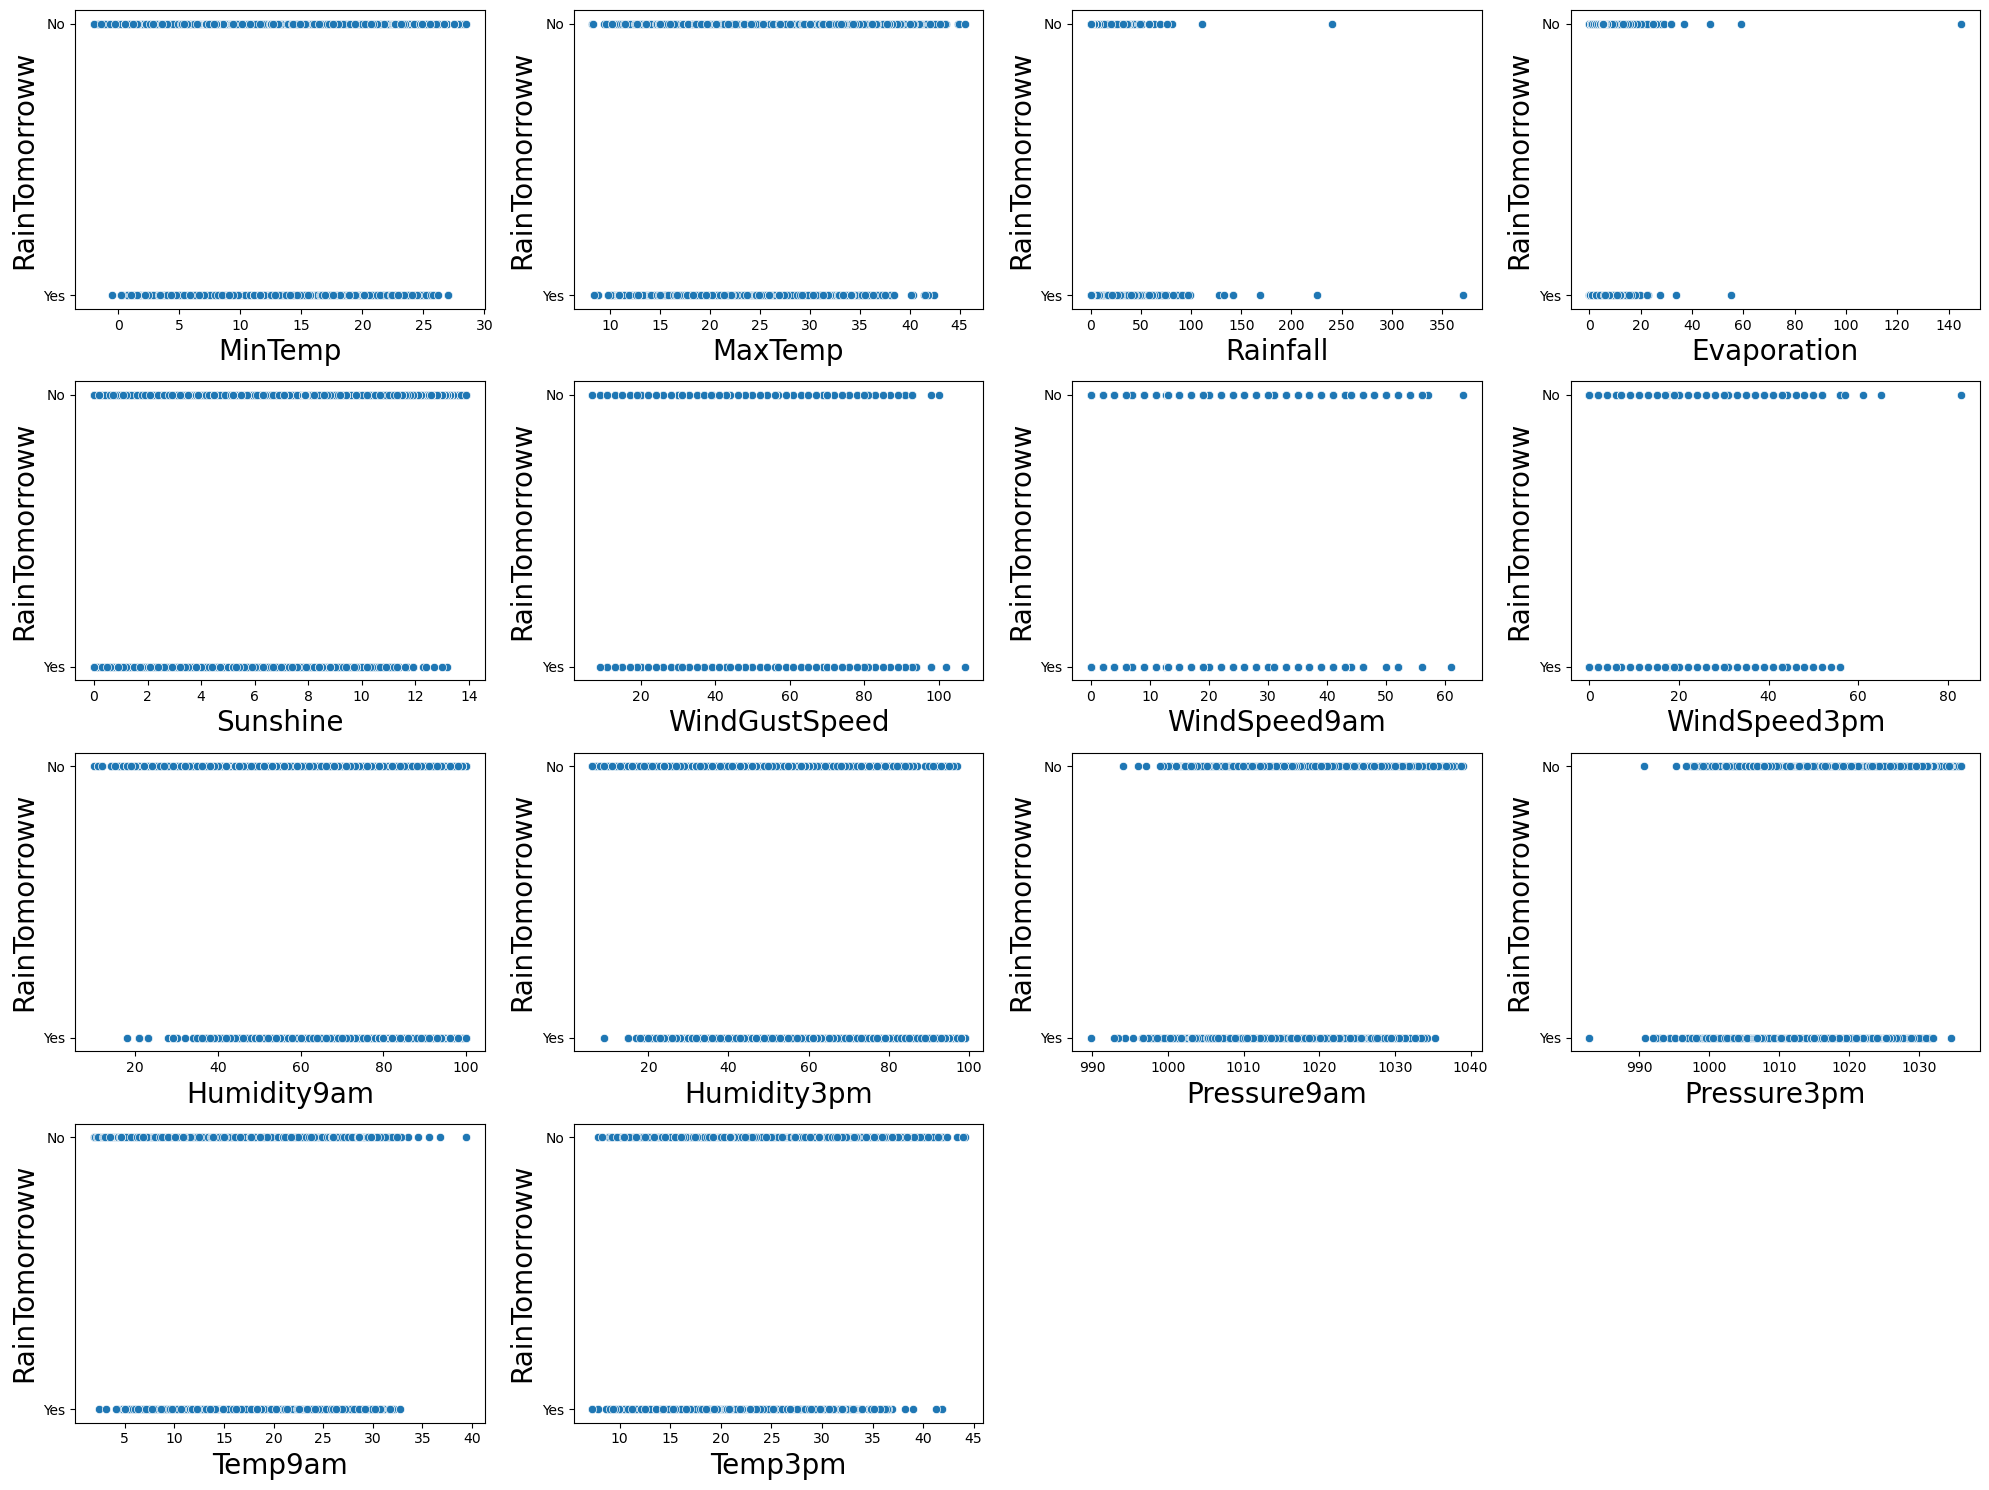

In [20]:
#lets see relation of features with label
plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]:
    if plotnumber<=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(df[col],df['RainTomorrow'])
        plt.xlabel(col, fontsize=20)
        plt.ylabel('RainTomorroww',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Observation
From here we can visualize the relation between our cont variables and label.

And it seems like all are impacting equally our target variable

In [21]:
#lets encode categorical features using label encoder
from sklearn.preprocessing import LabelEncoder 

In [22]:
for col in df.columns:
    if df[col].dtype == object:
        label = LabelEncoder()
        df[col] = label.fit_transform(df[col])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

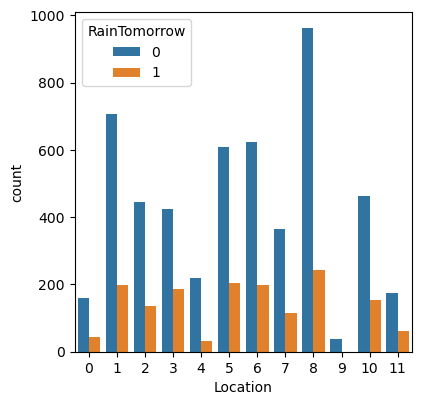

In [23]:
#lets build barplot for categ columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['Location','WindGustDir','WindDir9am','WindDir3pm','Cloud9am','Cloud3pm','RainToday','Month','Day','Year']]:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.countplot(df[col],data=df,hue='RainTomorrow')
        plt.xlabel(df[col],fontsize=15)
        
    plotnumber+=1   
plt.show()    

# Observation
Now let's remove outliers

In [24]:
#Let's use zscre tech to remove outliers
from scipy.stats import zscore

In [25]:
columns=df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
z_score=np.abs(zscore(columns))
z_score

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.954990e-01,0.207990,5.312920e-16,2.924379e-15,3.754887e-01,0.737499,0.673324,0.203327,1.539016,1.646846,1.344002,0.173897,0.152152
1,1.634110e-01,0.265231,5.312920e-16,2.924379e-15,3.754887e-01,0.897347,0.463855,1.368138,1.376828,1.165715,1.226694,0.121468,0.266510
2,2.612956e-01,0.265231,5.312920e-16,2.924379e-15,5.250161e-01,0.635321,0.882794,1.717352,1.106513,1.663437,1.075869,0.542637,0.082299
3,6.365197e-01,0.265231,5.312920e-16,2.924379e-15,1.119786e+00,0.182102,0.897697,1.309935,1.863394,0.004365,0.388779,0.035820,0.634933
4,1.338026e+00,0.169829,5.312920e-16,2.924379e-15,1.511975e-01,0.590814,0.254385,0.843553,0.944325,1.132534,1.528343,0.016609,1.170820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.139286e-01,0.265231,5.312920e-16,2.924379e-15,5.964399e-01,0.022254,0.688228,0.960721,1.430891,1.156985,0.868092,1.362295,0.051673
8421,1.960392e-01,0.265231,5.312920e-16,2.924379e-15,1.269314e+00,0.022254,0.897697,0.669709,1.593079,0.974487,0.666993,1.222484,0.300003
8422,4.570647e-01,0.265231,5.312920e-16,2.924379e-15,1.478575e-01,0.386458,0.897697,0.844316,1.430891,0.559719,0.281552,0.942861,0.567947
8423,4.733788e-01,0.265231,5.312920e-16,2.924379e-15,8.207311e-01,0.022254,1.107167,0.960721,1.430891,0.294268,0.231277,0.488473,0.551200


In [26]:
np.where(z_score>3)

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
          62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
         381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
         568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
         770,  795,  796,  797,  802,  928,  928,  935,  949,  979,  980,
         980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1203,
        1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
        1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873,
        1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108, 2116, 2186, 2201,
        2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527,
        2541, 2593, 2676, 2677, 2735, 2827, 2835, 2849, 2849, 2855, 2859,
        2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898, 2900, 2900, 2901,
        2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967,
        2975, 2989, 3003, 3027, 3045, 

In [27]:
df1=df[(z_score<3).all(axis=1)]
df1.shape

(6409, 25)

In [28]:
print('Data Loss is:-',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss is:- 5.220349009168885


# Observation
Here after removing outliers our data loss is in our acceptable range so we can proceed ahead.

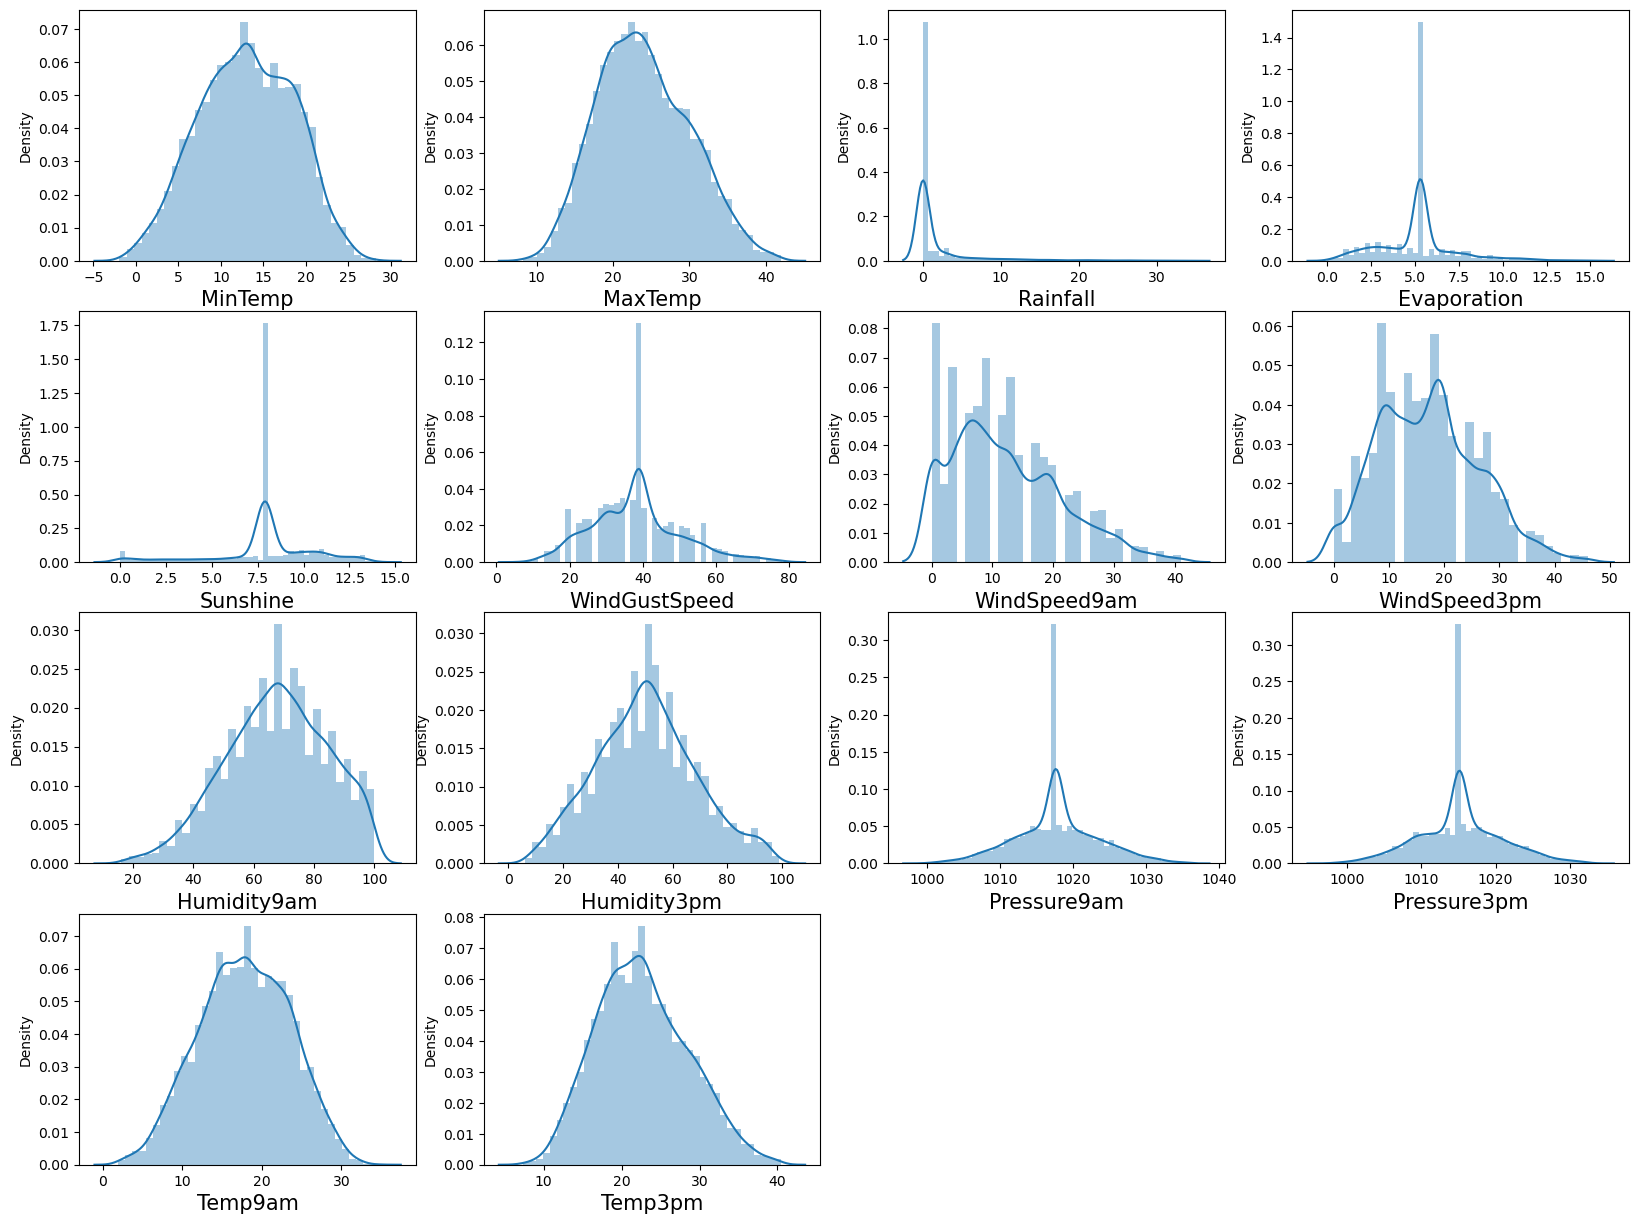

In [29]:
#lets build distplot to check dist for cont columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in df1[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

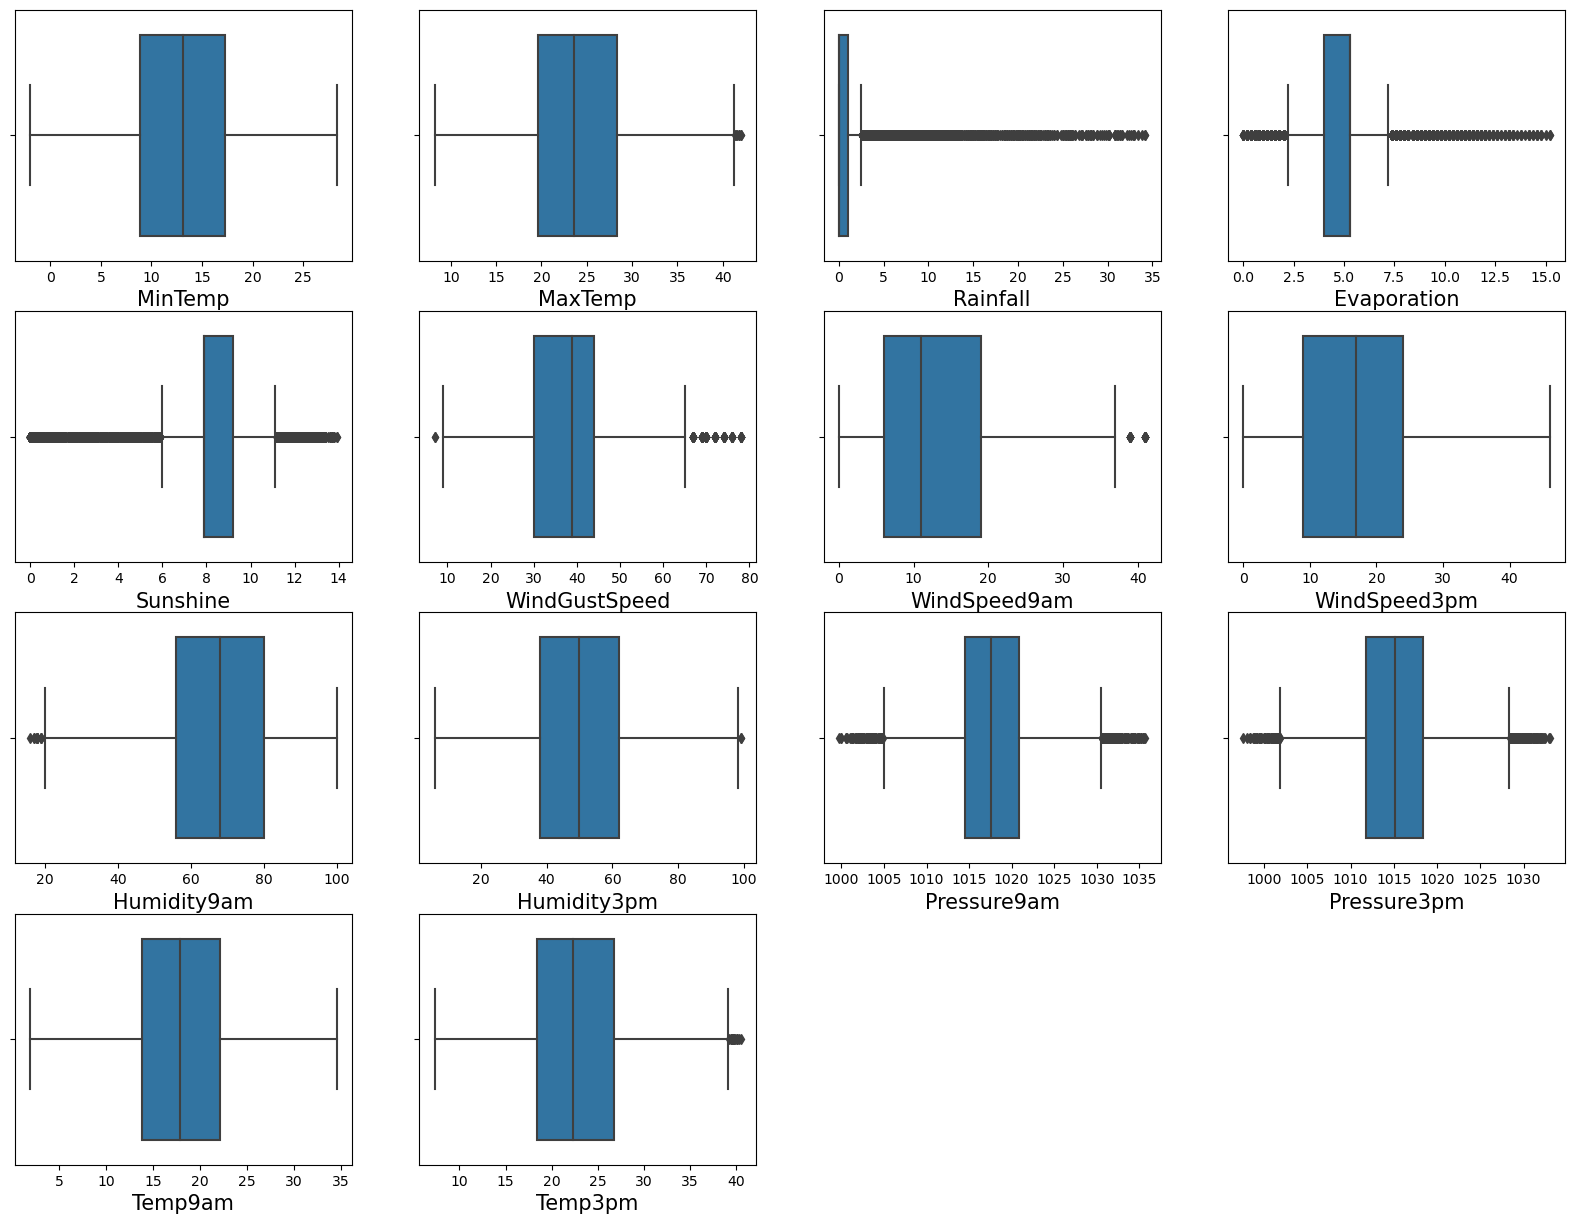

In [30]:
#lets build boxplot to check outliers for cont columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in df1[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

# Observation
Our outliers have been removed but not completely.We will fix them later

Now lets check for skewness


In [31]:
df1.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
Sunshine        -0.890629
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.705703
Cloud3pm        -0.670420
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Month            0.032770
Day              0.004771
Year             0.352924
dtype: float64

# Observation
Here we have skewness in Rainfall,Evaporation,Sunshine,WindSpeed9am,Cloud9am,Cloud3pm

So let's try diff methods to remove this skewness

In [32]:
df2=df1.copy()#copyingdata
df2.shape

(6409, 25)

In [33]:
#lets use cube root method
df1['Rainfall']=np.cbrt(df1['Rainfall'])
df1['Evaporation']=np.cbrt(df1['Evaporation'])
df1['Sunshine']=np.cbrt(df1['Sunshine'])
df1['WindSpeed9am']=np.cbrt(df1['WindSpeed9am'])
df1['Cloud9am']=np.cbrt(df1['Cloud9am'])
df1['Cloud3pm']=np.cbrt(df1['Cloud3pm'])


In [34]:
df1.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         1.390231
Evaporation     -0.983357
Sunshine        -3.108935
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am    -1.172540
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -1.656637
Cloud3pm        -1.757235
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Month            0.032770
Day              0.004771
Year             0.352924
dtype: float64

# Observation
Skewness have been increased inplace of decreasing,it means this tech is not working well 

Let's try another method

In [35]:
df3=df2.copy()
df3.shape

(6409, 25)

In [36]:
#Let's use log transformation method
#Lets impute 0 with their mean
df2['Rainfall']=df2['Rainfall'].replace(0,df2['Rainfall'].mean())
df2['Evaporation']=df2['Evaporation'].replace(0,df2['Evaporation'].mean())
df2['Sunshine']=df2['Sunshine'].replace(0,df2['Sunshine'].mean())
df2['WindSpeed9am']=df2['WindSpeed9am'].replace(0,df2['WindSpeed9am'].mean())
df2['Cloud9am']=df2['Cloud9am'].replace(0,df2['Cloud9am'].mean())
df2['Cloud3pm']=df2['Cloud3pm'].replace(0,df2['Cloud3pm'].mean())


In [37]:
#Lets use log transform method
df2['Rainfall']=np.log(df2['Rainfall'])
df2['Evaporation']=np.log(df2['Evaporation'])
df2['Sunshine']=np.log(df2['Sunshine'])
df2['WindSpeed9am']=np.log(df2['WindSpeed9am'])
df2['Cloud9am']=np.log(df2['Cloud9am'])
df2['Cloud3pm']=np.log(df2['Cloud3pm'])

In [38]:
df2.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Rainfall        -0.090181
Evaporation     -1.721481
Sunshine        -3.838707
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am    -0.585127
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -1.396027
Cloud3pm        -1.273298
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Month            0.032770
Day              0.004771
Year             0.352924
dtype: float64

# Observation
Skewness have been reduced and at same time have been increased in some columns ,let's power transform tech 

In [39]:
df4=df3.copy()#copying data
df4.shape

(6409, 25)

In [40]:
#Lets use power transformation technique
from sklearn.preprocessing import PowerTransformer

In [41]:
scaler=PowerTransformer()
features=['Rainfall','Evaporation','Sunshine','WindSpeed9am','Cloud9am','Cloud3pm']
df3[features]=scaler.fit_transform(df3[features].values)
df3[features]

,Rainfall,Evaporation,Sunshine,WindSpeed9am,Cloud9am,Cloud3pm
0,0.685674,0.155534,-0.118386,0.905389,1.169905,0.758674
1,-0.674943,0.155534,-0.118386,-0.858881,0.716483,0.758674
2,-0.674943,0.155534,-0.118386,0.822838,0.716483,-1.214085
3,-0.674943,0.155534,-0.118386,0.067403,0.716483,0.758674
4,1.045503,0.155534,-0.118386,-0.411105,0.716483,1.237408
...,...,...,...,...,...,...
8420,-0.674943,0.155534,-0.118386,0.275785,0.716483,0.758674
8421,-0.674943,0.155534,-0.118386,0.275785,0.716483,0.758674
8422,-0.674943,0.155534,-0.118386,-0.159565,0.716483,0.758674
8423,-0.674943,0.155534,-0.118386,0.275785,-0.857556,-1.214085


In [42]:
df3.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         0.970931
Evaporation      0.071784
Sunshine        -0.054513
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am    -0.132158
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.583140
Cloud3pm        -0.527584
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Month            0.032770
Day              0.004771
Year             0.352924
dtype: float64

# Observation
This method is working well as skewness is reduced so i m going ahead with this data only

In [43]:
#now let's check for co relation
corr=df3.corr()

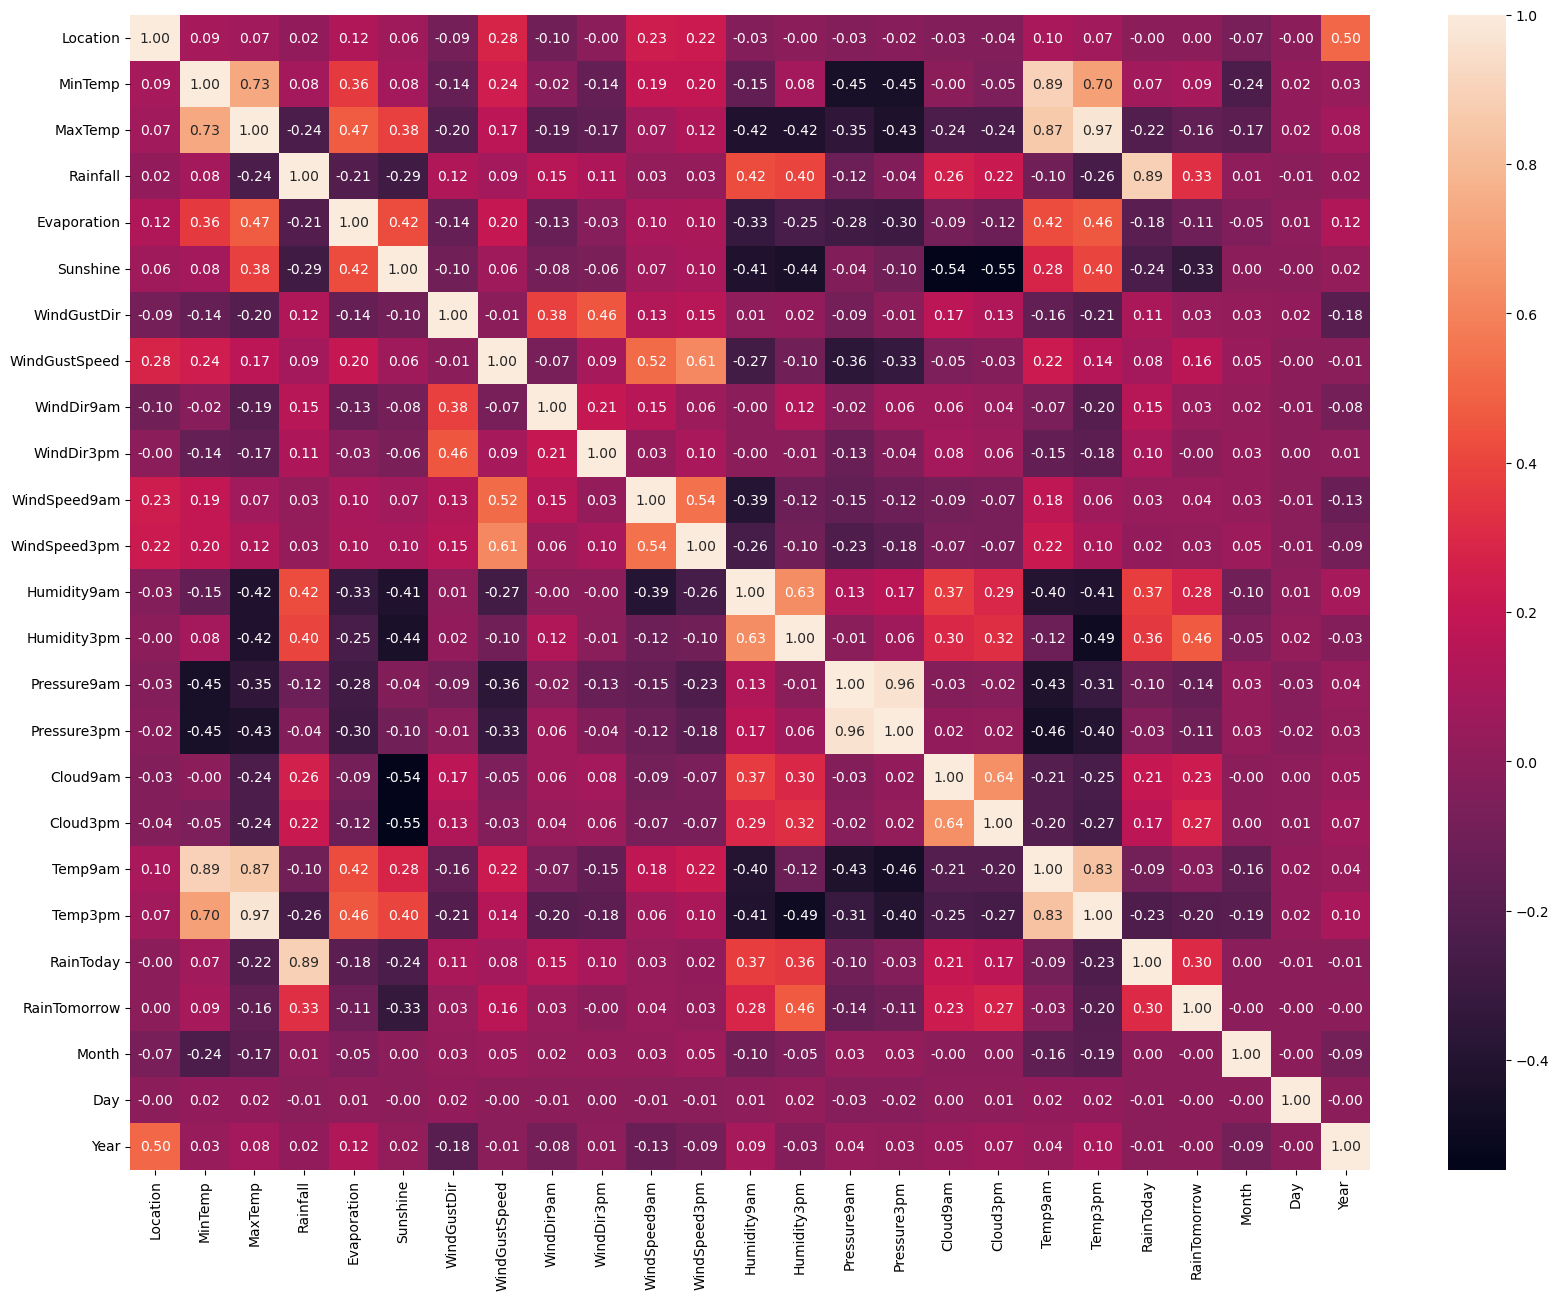

In [44]:
#let's plot heatmap to visualize
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,fmt='0.2f')
plt.show()

# Observation
1.Location,WindDir3pm,Month,Day,Year have very leass impact on our target variable.

2.MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,3pmHumidity,cloud,raintoday are psitively impacting our target variable.

3.Rest all features are in negative relation with our target

4.Temp3pm and maxTemp ,Temp9am and Mintemp&max temp are in high positive co relation

We can see other relation as well

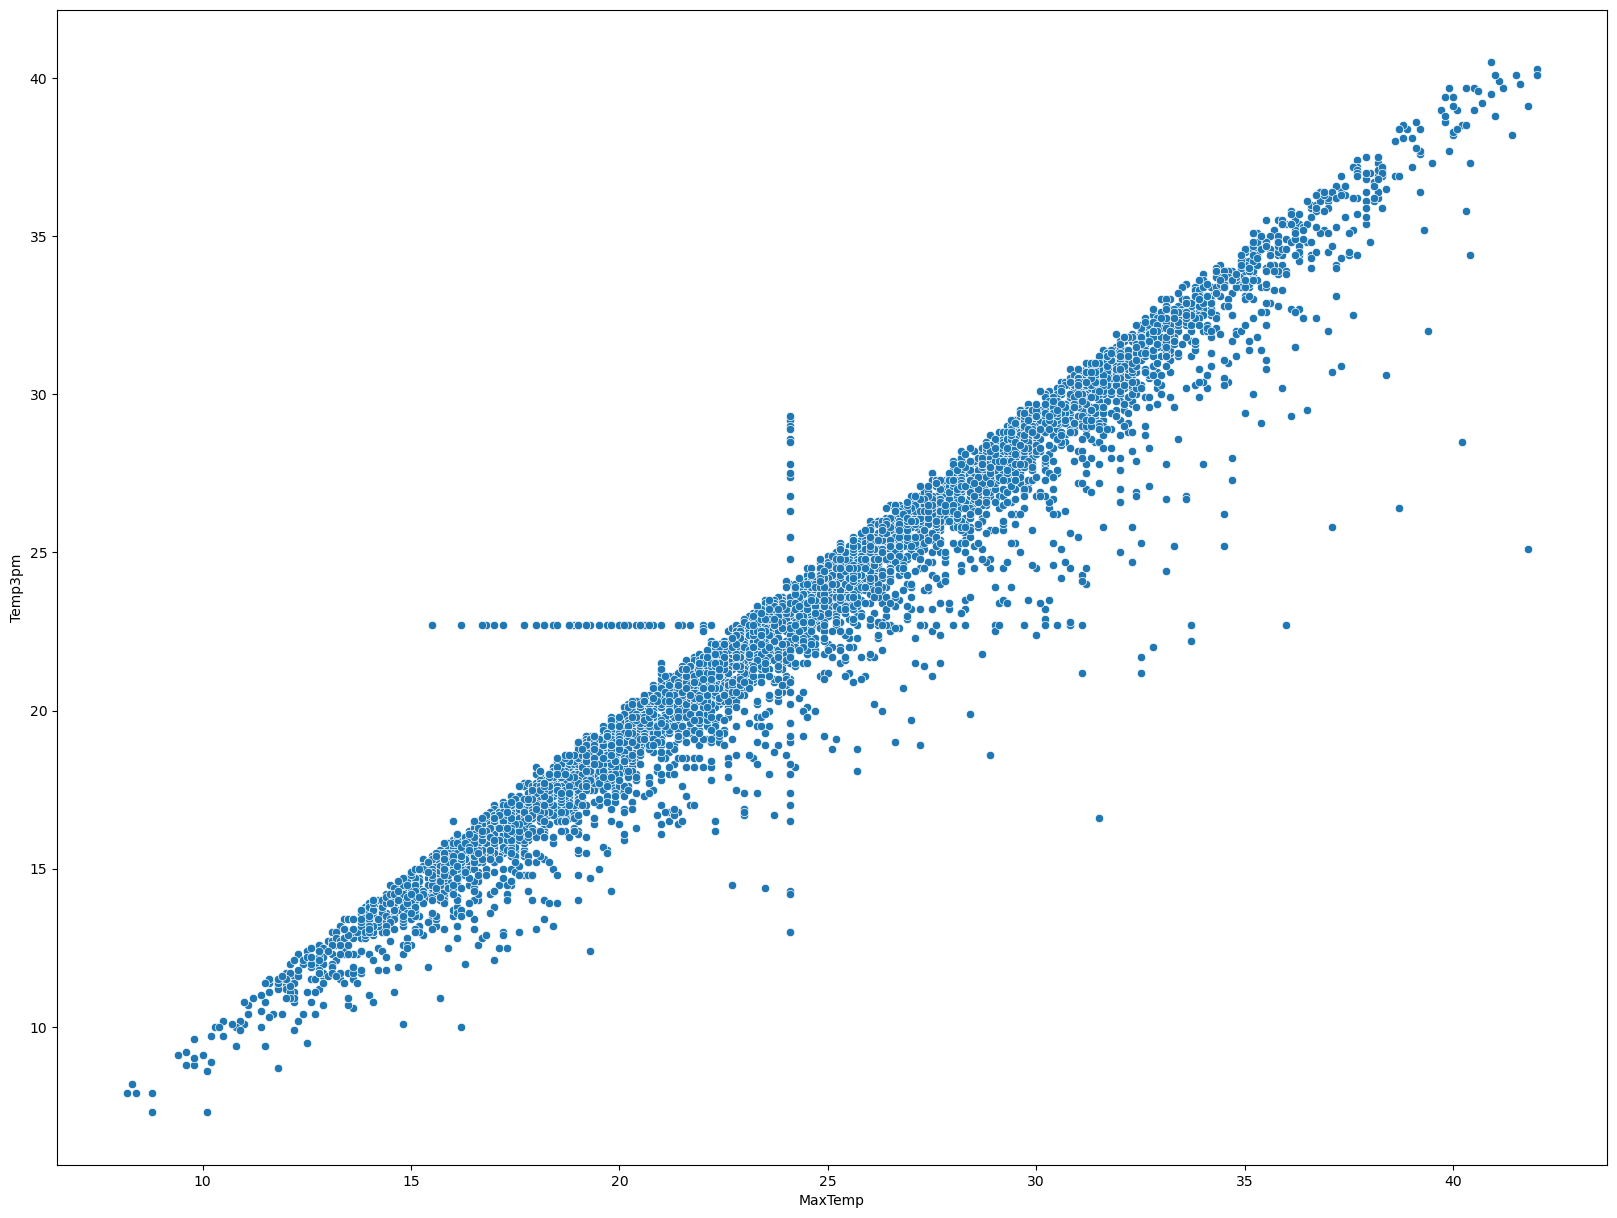

In [46]:
plt.figure(figsize=(20,15))
sns.scatterplot(df3['MaxTemp'],df3['Temp3pm'],data=df)
plt.show()

# Observation
Both are in linear relationship,it means we can delete one

In [47]:
df3.drop('MaxTemp',axis=1,inplace=True)
df3.shape

(6409, 24)

In [48]:
#let's separate features and label
X=df3.drop(columns=['RainTomorrow'],axis=1)
y=df3['RainTomorrow']

In [50]:
#let's standarize our data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [51]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']= X.columns
#let's check for value
vif

,vif,features
0,1.658389,Location
1,9.261606,MinTemp
2,5.394955,Rainfall
3,1.676929,Evaporation
4,2.166300,Sunshine
5,1.624571,WindGustDir
6,2.163969,WindGustSpeed
7,1.346416,WindDir9am
8,1.423839,WindDir3pm
9,2.011622,WindSpeed9am


# Observation 
Our vif threshold value is 10,but for columns Pressure9am,Pressure3pm,Temp9am,Temp3pm value is higher ,it means there is multicollinearity issue

So let's drop them off

In [56]:
X.drop(columns=['Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1,inplace=True)
X.shape

(6409, 19)

In [57]:
X

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,Month,Day,Year
0,1,13.4,0.685674,0.155534,-0.118386,13,44.000000,13,14,0.905389,24.0,71.0,22.0,1.169905,0.758674,0,12,1,2008
1,1,7.4,-0.674943,0.155534,-0.118386,14,44.000000,6,15,-0.858881,22.0,44.0,25.0,0.716483,0.758674,0,12,2,2008
2,1,12.9,-0.674943,0.155534,-0.118386,15,46.000000,13,15,0.822838,26.0,38.0,30.0,0.716483,-1.214085,0,12,3,2008
3,1,9.2,-0.674943,0.155534,-0.118386,4,24.000000,9,0,0.067403,9.0,45.0,16.0,0.716483,0.758674,0,12,4,2008
4,1,17.5,1.045503,0.155534,-0.118386,13,41.000000,1,7,-0.411105,20.0,82.0,33.0,0.716483,1.237408,0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,-0.674943,0.155534,-0.118386,0,31.000000,9,1,0.275785,11.0,51.0,24.0,0.716483,0.758674,0,6,21,2017
8421,9,3.6,-0.674943,0.155534,-0.118386,6,22.000000,9,3,0.275785,9.0,56.0,21.0,0.716483,0.758674,0,6,22,2017
8422,9,5.4,-0.674943,0.155534,-0.118386,3,37.000000,9,14,-0.159565,9.0,53.0,24.0,0.716483,0.758674,0,6,23,2017
8423,9,7.8,-0.674943,0.155534,-0.118386,9,28.000000,10,3,0.275785,7.0,51.0,24.0,-0.857556,-1.214085,0,6,24,2017


In [58]:
#let's again standarize our data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaledd=scale.fit_transform(X)

In [61]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaledd,i) for i in range(X_scaledd.shape[1])]
vif['features']= X.columns
#let's check for value
vif

,vif,features
0,1.648081,Location
1,1.474359,MinTemp
2,5.322123,Rainfall
3,1.622301,Evaporation
4,2.101607,Sunshine
5,1.594281,WindGustDir
6,2.003076,WindGustSpeed
7,1.285625,WindDir9am
8,1.345636,WindDir3pm
9,1.909086,WindSpeed9am


# Observation
Now there is no multicollinearity issue,so we can move ahead and let's check for feature selection technique

In [64]:
from sklearn.feature_selection import SelectKBest,f_classif

In [63]:
best_feat=SelectKBest(score_func=f_classif,k=19)
fit=best_feat.fit(X_scaledd,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(19,'Score'))

     Feature_Name        Score
12    Humidity3pm  1765.613198
4        Sunshine   781.649446
2        Rainfall   776.530072
15      RainToday   650.346018
11    Humidity9am   562.784722
14       Cloud3pm   513.445258
13       Cloud9am   354.868968
6   WindGustSpeed   176.260019
3     Evaporation    76.591082
1         MinTemp    56.142994
9    WindSpeed9am    11.103730
7      WindDir9am     7.813725
5     WindGustDir     7.683932
10   WindSpeed3pm     4.063094
18           Year     0.140958
16          Month     0.068068
17            Day     0.018881
0        Location     0.001118
8      WindDir3pm     0.000322


# Observation
As we have ssen in heatmap that year,month,day,location,winddir3pm are impacting bery less our target column so is this selection tech is telling so we can proceed ahead by dropping them

In [64]:
X.drop(columns=['Year','Month','Day','WindDir3pm','Location'],axis=1,inplace=True)
X.shape

(6409, 14)

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
0,13.4,0.685674,0.155534,-0.118386,13,44.000000,13,0.905389,24.0,71.0,22.0,1.169905,0.758674,0
1,7.4,-0.674943,0.155534,-0.118386,14,44.000000,6,-0.858881,22.0,44.0,25.0,0.716483,0.758674,0
2,12.9,-0.674943,0.155534,-0.118386,15,46.000000,13,0.822838,26.0,38.0,30.0,0.716483,-1.214085,0
3,9.2,-0.674943,0.155534,-0.118386,4,24.000000,9,0.067403,9.0,45.0,16.0,0.716483,0.758674,0
4,17.5,1.045503,0.155534,-0.118386,13,41.000000,1,-0.411105,20.0,82.0,33.0,0.716483,1.237408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,-0.674943,0.155534,-0.118386,0,31.000000,9,0.275785,11.0,51.0,24.0,0.716483,0.758674,0
8421,3.6,-0.674943,0.155534,-0.118386,6,22.000000,9,0.275785,9.0,56.0,21.0,0.716483,0.758674,0
8422,5.4,-0.674943,0.155534,-0.118386,3,37.000000,9,-0.159565,9.0,53.0,24.0,0.716483,0.758674,0
8423,7.8,-0.674943,0.155534,-0.118386,9,28.000000,10,0.275785,7.0,51.0,24.0,-0.857556,-1.214085,0


In [66]:
#let's again standarize our data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scall=scale.fit_transform(X)

In [67]:
X_scall.shape

(6409, 14)

In [69]:
y.value_counts()

0    4979
1    1430
Name: RainTomorrow, dtype: int64

# Observation
Our Target column is in ratio 78;22 and i m considering it as imbalanced here so let's balance it using SMOTE method

In [70]:
#importing SMOTE

from imblearn.over_sampling import SMOTE

In [72]:
SM=SMOTE()
x,y=SM.fit_resample(X,y)

In [75]:
x

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
0,13.400000,0.685674,0.155534,-0.118386,13,44.000000,13,0.905389,24.000000,71.000000,22.000000,1.169905,0.758674,0
1,7.400000,-0.674943,0.155534,-0.118386,14,44.000000,6,-0.858881,22.000000,44.000000,25.000000,0.716483,0.758674,0
2,12.900000,-0.674943,0.155534,-0.118386,15,46.000000,13,0.822838,26.000000,38.000000,30.000000,0.716483,-1.214085,0
3,9.200000,-0.674943,0.155534,-0.118386,4,24.000000,9,0.067403,9.000000,45.000000,16.000000,0.716483,0.758674,0
4,17.500000,1.045503,0.155534,-0.118386,13,41.000000,1,-0.411105,20.000000,82.000000,33.000000,0.716483,1.237408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,17.421647,-0.313624,0.764301,-0.118386,6,38.105098,7,-0.658523,0.894902,67.552549,78.762745,0.523375,0.758674,0
9954,9.063115,1.834637,-2.015516,-0.090061,14,53.104079,13,0.965905,26.447961,93.328059,66.880099,0.619819,0.656997,1
9955,11.127800,-0.674943,-0.816758,-1.463561,11,40.224857,12,0.833997,25.224857,54.937857,77.550286,-0.031474,0.944218,0
9956,16.076085,1.476547,0.082894,-0.297169,4,30.919962,4,0.363154,13.000000,89.320154,91.080038,1.169905,1.237408,1


In [76]:
#let's again standarize our data
X_scalll=scale.fit_transform(x)

# Modelling

In [79]:
#creating training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scalll,y,test_size=0.25,random_state=164)

In [80]:
#import lib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [81]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("=======Train Result======")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n===Test Result====")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [82]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [83]:
metric_score(log,x_train,x_test,y_train,y_test,train=True)
metric_score(log,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:78.20%

===Test Result====
Accuracy Score:79.52%


Test Classification Report
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1219
           1       0.81      0.78      0.80      1271

    accuracy                           0.80      2490
   macro avg       0.80      0.80      0.80      2490
weighted avg       0.80      0.80      0.80      2490



In [84]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [85]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:89.26%

===Test Result====
Accuracy Score:84.02%


Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1219
           1       0.80      0.91      0.85      1271

    accuracy                           0.84      2490
   macro avg       0.85      0.84      0.84      2490
weighted avg       0.85      0.84      0.84      2490



In [86]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
metric_score(tree,x_train,x_test,y_train,y_test,train=True)
metric_score(tree,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:99.88%

===Test Result====
Accuracy Score:82.01%


Test Classification Report
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1219
           1       0.81      0.85      0.83      1271

    accuracy                           0.82      2490
   macro avg       0.82      0.82      0.82      2490
weighted avg       0.82      0.82      0.82      2490



In [88]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [89]:
metric_score(bag,x_train,x_test,y_train,y_test,train=True)
metric_score(bag,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:99.18%

===Test Result====
Accuracy Score:87.71%


Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1219
           1       0.89      0.86      0.88      1271

    accuracy                           0.88      2490
   macro avg       0.88      0.88      0.88      2490
weighted avg       0.88      0.88      0.88      2490



In [90]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
metric_score(rand,x_train,x_test,y_train,y_test,train=True)
metric_score(rand,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:99.88%

===Test Result====
Accuracy Score:89.88%


Test Classification Report
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1219
           1       0.90      0.90      0.90      1271

    accuracy                           0.90      2490
   macro avg       0.90      0.90      0.90      2490
weighted avg       0.90      0.90      0.90      2490



In [92]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [93]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:83.70%

===Test Result====
Accuracy Score:84.06%


Test Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1219
           1       0.85      0.84      0.84      1271

    accuracy                           0.84      2490
   macro avg       0.84      0.84      0.84      2490
weighted avg       0.84      0.84      0.84      2490



In [94]:
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [95]:
metric_score(grad,x_train,x_test,y_train,y_test,train=True)
metric_score(grad,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:87.98%

===Test Result====
Accuracy Score:87.51%


Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1219
           1       0.89      0.86      0.88      1271

    accuracy                           0.88      2490
   macro avg       0.88      0.88      0.88      2490
weighted avg       0.88      0.88      0.88      2490



In [96]:
support=SVC()
support.fit(x_train,y_train)

SVC()

In [97]:
metric_score(support,x_train,x_test,y_train,y_test,train=True)
metric_score(support,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:85.42%

===Test Result====
Accuracy Score:84.42%


Test Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1219
           1       0.85      0.84      0.85      1271

    accuracy                           0.84      2490
   macro avg       0.84      0.84      0.84      2490
weighted avg       0.84      0.84      0.84      2490



In [98]:
model=xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [99]:
metric_score(model,x_train,x_test,y_train,y_test,train=True)
metric_score(model,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:99.04%

===Test Result====
Accuracy Score:90.44%


Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1219
           1       0.92      0.89      0.90      1271

    accuracy                           0.90      2490
   macro avg       0.90      0.90      0.90      2490
weighted avg       0.90      0.90      0.90      2490



# Observation
As per our model performance ,XGBClassifier model is giving best results.But let's validate our model performance using cross vald score 

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
#lets check for log model
pred=log.predict(x_test)
score=cross_val_score(log,X_scalll,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred)-score)

Difference is ; 0.039394090677123406


In [102]:
#now lets check for knn model
pred2=knn.predict(x_test)
score2=cross_val_score(knn,X_scalll,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred2)-score2)

Difference is ; 0.08005780026182074


In [103]:
#now lets check for decision tree model
pred3=tree.predict(x_test)
score3=cross_val_score(tree,X_scalll,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred3)-score3)

Difference is ; 0.07121822296720792


In [104]:
#now lets check for bagging model
pred4=bag.predict(x_test)
score4=cross_val_score(bag,X_scalll,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred4)-score4)

Difference is ; 0.08877539288242875


In [105]:
#now lets check for random forest model
pred5=rand.predict(x_test)
score5=cross_val_score(rand,X_scalll,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred5)-score5)

Difference is ; 0.09309064484961438


In [106]:
#now lets check for ada boost model
pred6=ada.predict(x_test)
score6=cross_val_score(ada,X_scalll,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred6)-score6)

Difference is ; 0.07242001658063701


In [107]:
#now lets check for gradient boost model
pred7=grad.predict(x_test)
score7=cross_val_score(grad,X_scalll,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred7)-score7)

Difference is ; 0.09259221718617305


In [108]:
#now lets check for SVC model
pred8=support.predict(x_test)
score8=cross_val_score(support,X_scalll,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred8)-score8)

Difference is ; 0.08256315064376041


In [109]:
#now lets check for xgb model
pred9=model.predict(x_test)
score9=cross_val_score(model,X_scalll,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred9)-score9)

Difference is ; 0.1258224258157693


# Observation
On the basis of cross val score our Logistic Regression model is performing best and this is our final model

Let's use tuning tech to improve our model performance

In [73]:
from sklearn.model_selection import GridSearchCV

In [111]:
params={
       'C':[2,3,4,5,6,7,8,10,11,12,14,15],
       'random_state':[20,25,30,35,40,45,50,55,60,70,75,80,90,100] 
       } 
grd=GridSearchCV(log,param_grid=params)
grd.fit(x_train,y_train)
print('Best_Parameters ',grd.best_params_)

Best_Parameters  {'C': 2, 'random_state': 20}


In [112]:
final=grd.best_estimator_
final.fit(x_train,y_train)

LogisticRegression(C=2, random_state=20)

In [113]:
metric_score(final,x_train,x_test,y_train,y_test,train=True)
metric_score(final,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:78.20%

===Test Result====
Accuracy Score:79.56%


Test Classification Report
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1219
           1       0.81      0.78      0.80      1271

    accuracy                           0.80      2490
   macro avg       0.80      0.80      0.80      2490
weighted avg       0.80      0.80      0.80      2490



# Observation
After performing tuning tech our score increased little so this is our final model

In [114]:
#lets check roc ,auc score
from sklearn.metrics import roc_curve,roc_auc_score

In [115]:
fpr,tpr,thresholds=roc_curve(y_test,pred)

In [116]:
print('threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False Positive Rate=',fpr)

threshold= [2 1 0]
True Positive Rate= [0.        0.7804878 1.       ]
False Positive Rate= [0.         0.18949959 1.        ]


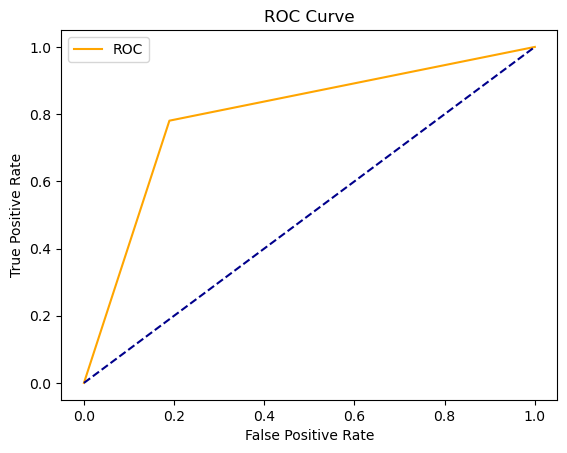

In [117]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
    

In [118]:
#Let's check auc score
auc_score=roc_auc_score(y_test,pred)
print(auc_score*100)

79.54941075251605


In [119]:
#now lets save model using joblib
import joblib

In [120]:
joblib.dump(final,'RainPredictionModel.obj')

['RainPredictionModel.obj']

# Now let's predict our secong target variable i.e Rainfall(how much it will rain)

In [45]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,1,13.4,22.900000,0.6,5.302395,7.890896,13,44.000000,13,14,...,1007.1,8.0,7.0,16.9,21.8,0,0,12,1,2008
1,1,7.4,25.100000,0.0,5.302395,7.890896,14,44.000000,6,15,...,1007.8,7.0,7.0,17.2,24.3,0,0,12,2,2008
2,1,12.9,25.700000,0.0,5.302395,7.890896,15,46.000000,13,15,...,1008.7,7.0,2.0,21.0,23.2,0,0,12,3,2008
3,1,9.2,28.000000,0.0,5.302395,7.890896,4,24.000000,9,0,...,1012.8,7.0,7.0,18.1,26.5,0,0,12,4,2008
4,1,17.5,32.300000,1.0,5.302395,7.890896,13,41.000000,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.302395,7.890896,0,31.000000,9,1,...,1020.3,7.0,7.0,10.1,22.4,0,0,6,21,2017
8421,9,3.6,25.300000,0.0,5.302395,7.890896,6,22.000000,9,3,...,1019.1,7.0,7.0,10.9,24.5,0,0,6,22,2017
8422,9,5.4,26.900000,0.0,5.302395,7.890896,3,37.000000,9,14,...,1016.8,7.0,7.0,12.5,26.1,0,0,6,23,2017
8423,9,7.8,27.000000,0.0,5.302395,7.890896,9,28.000000,10,3,...,1016.5,3.0,2.0,15.1,26.0,0,0,6,24,2017


In [46]:
df.shape

(6762, 25)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   int32  
 1   MinTemp        6762 non-null   float64
 2   MaxTemp        6762 non-null   float64
 3   Rainfall       6762 non-null   float64
 4   Evaporation    6762 non-null   float64
 5   Sunshine       6762 non-null   float64
 6   WindGustDir    6762 non-null   int32  
 7   WindGustSpeed  6762 non-null   float64
 8   WindDir9am     6762 non-null   int32  
 9   WindDir3pm     6762 non-null   int32  
 10  WindSpeed9am   6762 non-null   float64
 11  WindSpeed3pm   6762 non-null   float64
 12  Humidity9am    6762 non-null   float64
 13  Humidity3pm    6762 non-null   float64
 14  Pressure9am    6762 non-null   float64
 15  Pressure3pm    6762 non-null   float64
 16  Cloud9am       6762 non-null   float64
 17  Cloud3pm       6762 non-null   float64
 18  Temp9am 

# Observation
1.Above is our dataset which contains 6762 rows and 25 columns after removing duplicates.

2.In this dataset we have to predict how much it will rain i.e Rainfall

3.Our Target variable is cont in nature so it is a Regression problem.

4.There are no nulls in our dataset.

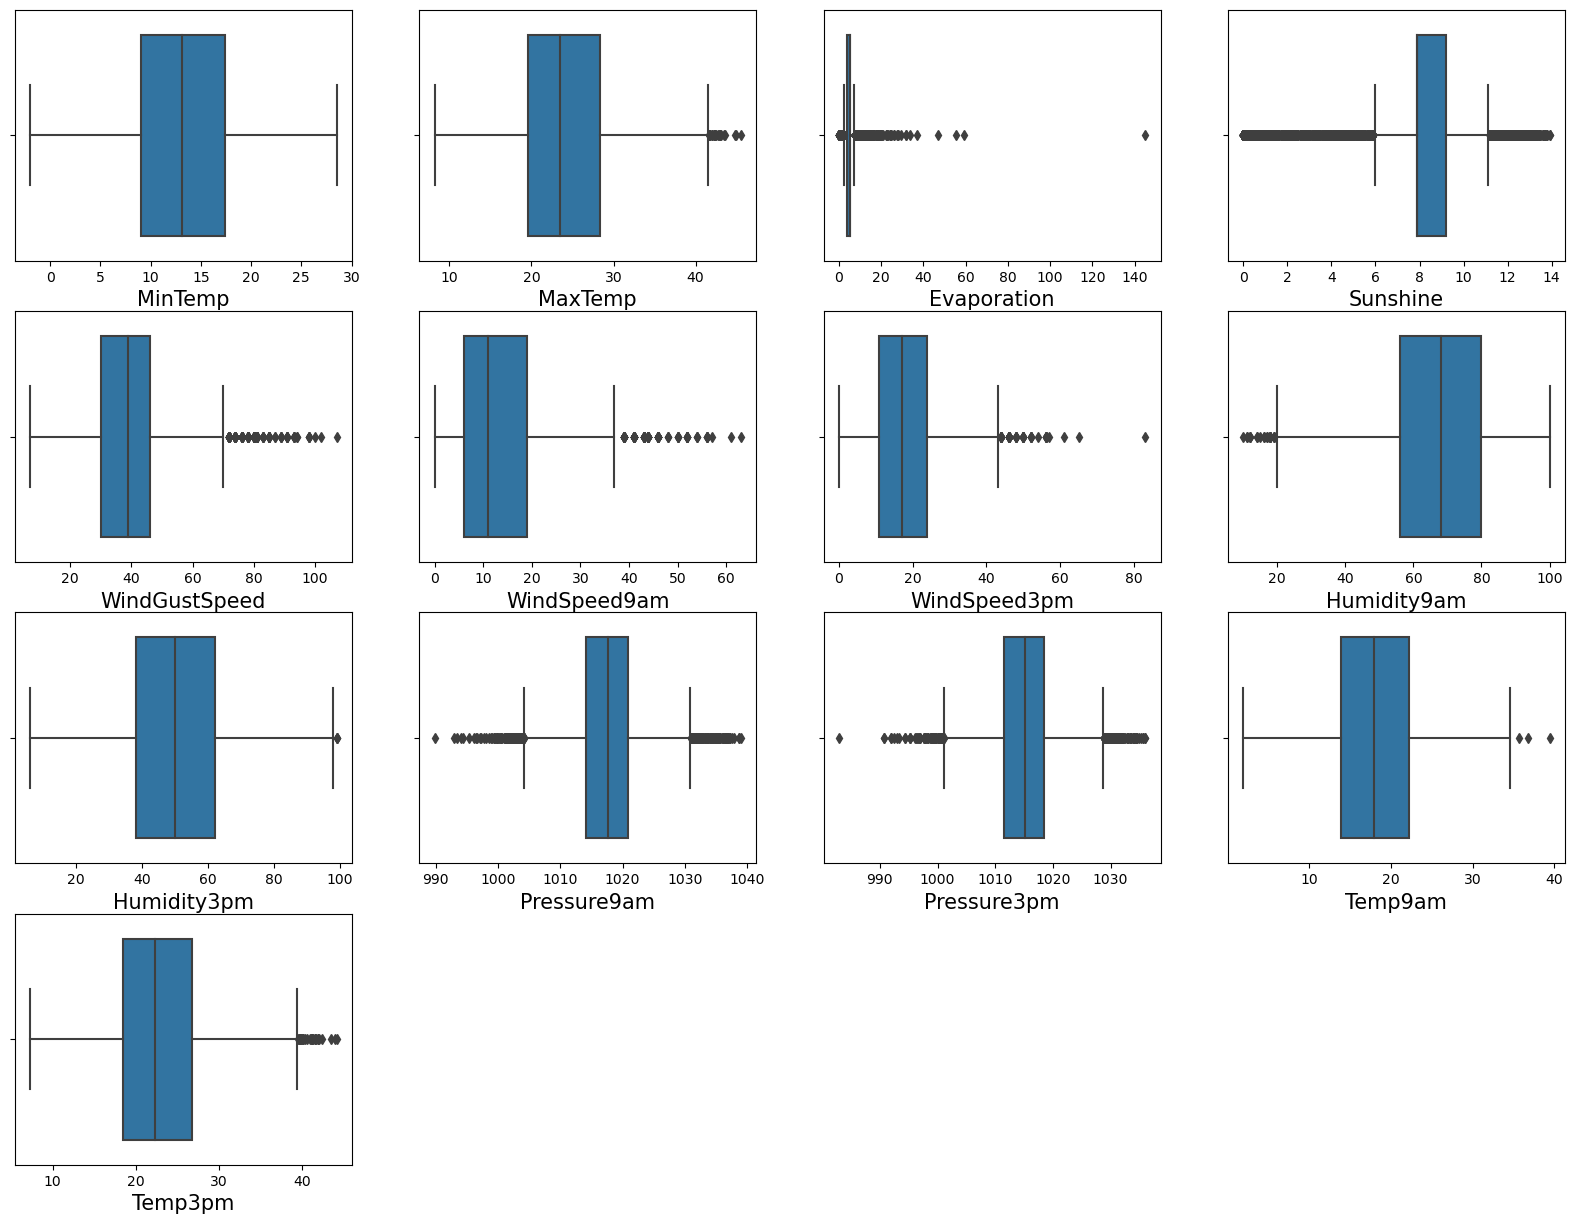

In [48]:
#lets build boxplot to check outliers for cont columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in df[['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

# Observation
Except for mintemp column all columns are having outliers ,let's remove them

In [49]:
columns=df[['MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
z_score=np.abs(zscore(columns))
z_score

,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.954990e-01,5.312920e-16,2.924379e-15,3.754887e-01,0.737499,0.673324,0.203327,1.539016,1.646846,1.344002,0.173897,0.152152
1,1.634110e-01,5.312920e-16,2.924379e-15,3.754887e-01,0.897347,0.463855,1.368138,1.376828,1.165715,1.226694,0.121468,0.266510
2,2.612956e-01,5.312920e-16,2.924379e-15,5.250161e-01,0.635321,0.882794,1.717352,1.106513,1.663437,1.075869,0.542637,0.082299
3,6.365197e-01,5.312920e-16,2.924379e-15,1.119786e+00,0.182102,0.897697,1.309935,1.863394,0.004365,0.388779,0.035820,0.634933
4,1.338026e+00,5.312920e-16,2.924379e-15,1.511975e-01,0.590814,0.254385,0.843553,0.944325,1.132534,1.528343,0.016609,1.170820
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.139286e-01,5.312920e-16,2.924379e-15,5.964399e-01,0.022254,0.688228,0.960721,1.430891,1.156985,0.868092,1.362295,0.051673
8421,1.960392e-01,5.312920e-16,2.924379e-15,1.269314e+00,0.022254,0.897697,0.669709,1.593079,0.974487,0.666993,1.222484,0.300003
8422,4.570647e-01,5.312920e-16,2.924379e-15,1.478575e-01,0.386458,0.897697,0.844316,1.430891,0.559719,0.281552,0.942861,0.567947
8423,4.733788e-01,5.312920e-16,2.924379e-15,8.207311e-01,0.022254,1.107167,0.960721,1.430891,0.294268,0.231277,0.488473,0.551200


In [50]:
df7=df[(z_score<3).all(axis=1)]
df7.shape

(6493, 25)

In [51]:
print('Data Loss is:-',((df.shape[0]-df7.shape[0])/df.shape[0])*100)

Data Loss is:- 3.9781129843241643


# Observation
After removing outliers our dataloss is fine so we can move ahead

In [52]:
#let's check for skewness
df7.skew()

Location          0.010421
MinTemp          -0.088567
MaxTemp           0.273410
Rainfall         14.239810
Evaporation       0.719041
Sunshine         -0.896989
WindGustDir       0.102368
WindGustSpeed     0.477732
WindDir9am        0.203128
WindDir3pm       -0.130871
WindSpeed9am      0.676418
WindSpeed3pm      0.342025
Humidity9am      -0.239105
Humidity3pm       0.156715
Pressure9am       0.067232
Pressure3pm       0.091898
Cloud9am         -0.718781
Cloud3pm         -0.681735
Temp9am          -0.072445
Temp3pm           0.297449
RainToday         1.263339
RainTomorrow      1.289048
Month             0.036830
Day               0.006584
Year              0.355882
dtype: float64

# Observation
There is some skewness in our cont columns

Let's use power transform tech to reduce skewness

In [53]:
scaler=PowerTransformer()
features=['Evaporation','Sunshine','WindSpeed9am','Cloud9am','Cloud3pm']
df7[features]=scaler.fit_transform(df7[features].values)
df7[features]

,Evaporation,Sunshine,WindSpeed9am,Cloud9am,Cloud3pm
0,0.154488,-0.104824,0.901227,1.165085,0.751397
1,0.154488,-0.104824,-0.863204,0.706872,0.751397
2,0.154488,-0.104824,0.818588,0.706872,-1.224842
3,0.154488,-0.104824,0.062668,0.706872,0.751397
4,0.154488,-0.104824,-0.415790,0.706872,1.234657
...,...,...,...,...,...
8420,0.154488,-0.104824,0.271120,0.706872,0.751397
8421,0.154488,-0.104824,0.271120,0.706872,0.751397
8422,0.154488,-0.104824,-0.164315,0.706872,0.751397
8423,0.154488,-0.104824,0.271120,-0.873093,-1.224842


In [54]:
df7.skew()

Location          0.010421
MinTemp          -0.088567
MaxTemp           0.273410
Rainfall         14.239810
Evaporation       0.073491
Sunshine         -0.068485
WindGustDir       0.102368
WindGustSpeed     0.477732
WindDir9am        0.203128
WindDir3pm       -0.130871
WindSpeed9am     -0.132147
WindSpeed3pm      0.342025
Humidity9am      -0.239105
Humidity3pm       0.156715
Pressure9am       0.067232
Pressure3pm       0.091898
Cloud9am         -0.589562
Cloud3pm         -0.532885
Temp9am          -0.072445
Temp3pm           0.297449
RainToday         1.263339
RainTomorrow      1.289048
Month             0.036830
Day               0.006584
Year              0.355882
dtype: float64

# Observation
Here our skewness have been reduced, now lets check for corelation

In [55]:
rela=df7.corr()

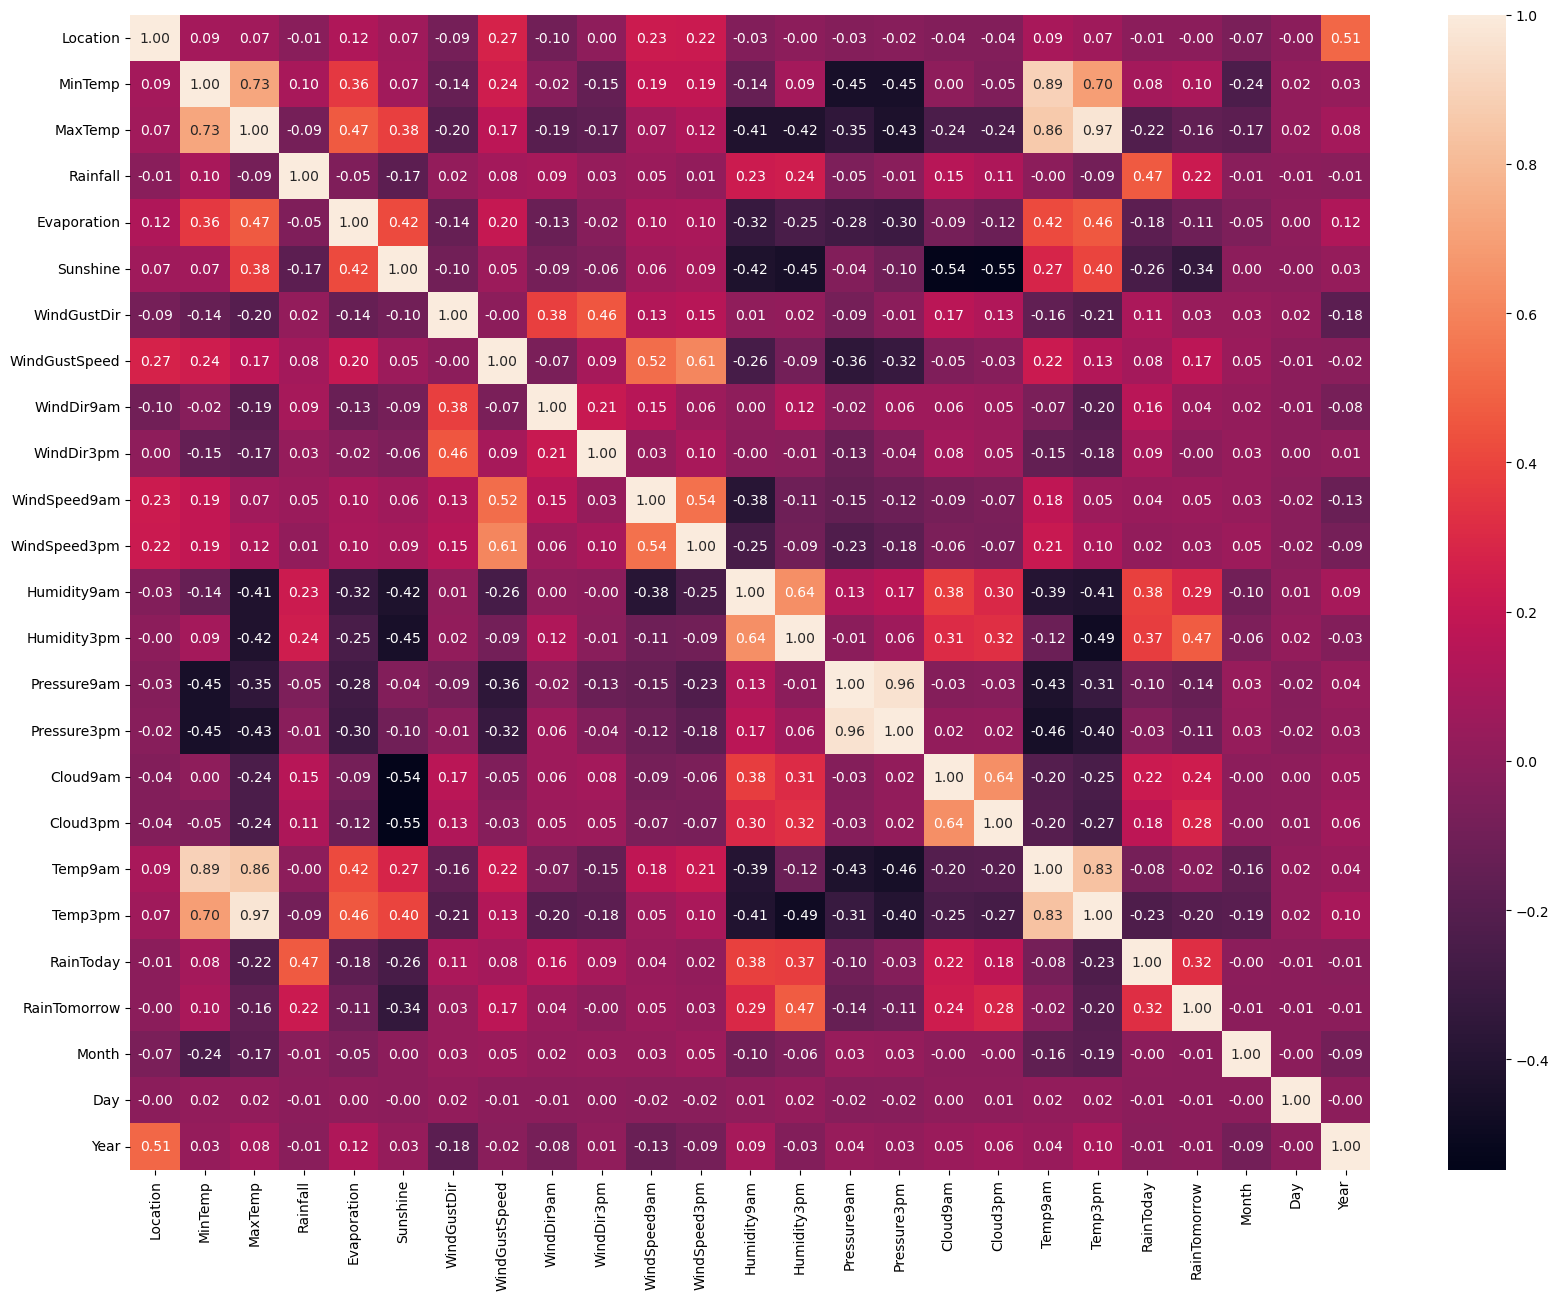

In [56]:
#let's plot heatmap
plt.figure(figsize=(20,15))
sns.heatmap(rela,annot=True,fmt='0.2f')
plt.show()

# Observation
1.RainToday,RainTomorrow,Cloud9am,Cloud3pm,Humidity9am,Humidity3pm,WindSpeed9am,WindSpeed3pm are positively impacting our column.

2.Rest all are in negative relation with our column

3.We can visualize other relation as well

In [57]:
#let's separate features and label
A=df7.drop(columns=['Rainfall'],axis=1)
b=df7['Rainfall']

In [58]:
#let's standarize our data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
C=scale.fit_transform(A)

In [59]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(C,i) for i in range(C.shape[1])]
vif['features']= A.columns
#let's check for value
vif

,vif,features
0,1.662932,Location
1,9.225872,MinTemp
2,26.156133,MaxTemp
3,1.649264,Evaporation
4,2.194389,Sunshine
5,1.624143,WindGustDir
6,2.256612,WindGustSpeed
7,1.347487,WindDir9am
8,1.425121,WindDir3pm
9,2.013932,WindSpeed9am


# Observation
Vif value for for Pressure9am,Pressure3pm,Temp9am,Temp3pm,MaxTemp is more than our threshold value i.e 10

It means there is multicollinearity poroblem so let's drop them off

In [60]:
A.drop(columns=['Temp9am','Temp3pm','Pressure9am','Pressure3pm','MaxTemp'],axis=1,inplace=True)
A.shape

(6493, 19)

In [61]:
#let's again standarize our data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
D=scale.fit_transform(A)

In [62]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(D,i) for i in range(D.shape[1])]
vif['features']= A.columns
#let's check for value
vif

,vif,features
0,1.654584,Location
1,1.463027,MinTemp
2,1.596525,Evaporation
3,2.126154,Sunshine
4,1.592169,WindGustDir
5,2.086852,WindGustSpeed
6,1.286222,WindDir9am
7,1.344930,WindDir3pm
8,1.905779,WindSpeed9am
9,1.897880,WindSpeed3pm


# Observation
Now our vif value is in our range so we can proceed ahead 

Let's check for feature selection tech

In [65]:
best_feat=SelectKBest(score_func=f_classif,k=19)
fit=best_feat.fit(D,b)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(A.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(19,'Score'))

     Feature_Name         Score
10    Humidity9am  7.570086e+00
11    Humidity3pm  7.165129e+00
15   RainTomorrow  5.721910e+00
3        Sunshine  4.035060e+00
12       Cloud9am  2.973498e+00
13       Cloud3pm  2.384611e+00
2     Evaporation  2.253612e+00
6      WindDir9am  1.747096e+00
4     WindGustDir  1.668356e+00
9    WindSpeed3pm  1.619727e+00
5   WindGustSpeed  1.565482e+00
18           Year  1.406333e+00
8    WindSpeed9am  1.368108e+00
1         MinTemp  1.186560e+00
7      WindDir3pm  1.146045e+00
16          Month  1.096793e+00
17            Day  1.048685e+00
0        Location  9.915413e-01
14      RainToday -9.258650e+16


# Observation
It looks like Location and Rain Today are not affecting much our target column hence let's delete them

In [66]:
A.drop(columns=['Location','RainToday'],axis=1,inplace=True)
A.shape

(6493, 17)

In [67]:
#let's again standarize our data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
E=scale.fit_transform(A)

# Modelling

In [68]:
#splitting into train and test data
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(E,b,test_size=0.25,random_state=205)

In [70]:
#lets import neccesary lib
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
#importing important metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [51]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y1=reg.predict(x_test)
print('R2 score is :',r2_score(y_test,y1))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y1))
print('Mean Squared Error is :',mean_squared_error(y_test,y1))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y1)))

R2 score is : 0.07286494149676359
Mean Absolute Error is : 3.9686749352997195
Mean Squared Error is : 181.15634801130008
Root Mean Squared Error is : 13.459433420887377


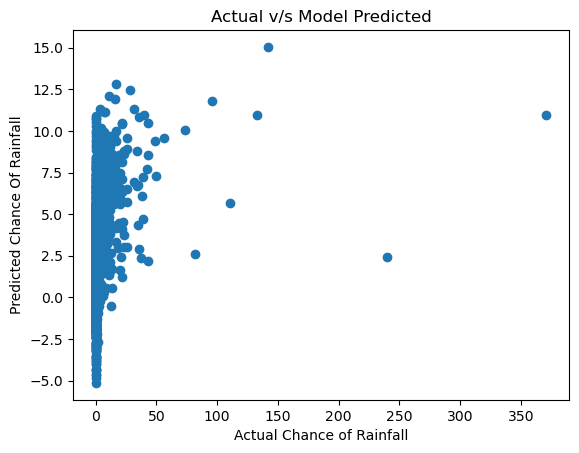

In [53]:
#Let's visualize using scatter plot
plt.scatter(y_test,y1)
plt.xlabel('Actual Chance of Rainfall')
plt.ylabel('Predicted Chance Of Rainfall')
plt.title('Actual v/s Model Predicted')
plt.show()

In [54]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y2=knn.predict(x_test)
print('R2 score is :',r2_score(y_test,y2))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y2))
print('Mean Squared Error is :',mean_squared_error(y_test,y2))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y2)))

R2 score is : 0.07571777332914587
Mean Absolute Error is : 3.507688540402418
Mean Squared Error is : 180.59892264861443
Root Mean Squared Error is : 13.438709858041227


In [55]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
y3=tree.predict(x_test)
print('R2 score is :',r2_score(y_test,y3))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y3))
print('Mean Squared Error is :',mean_squared_error(y_test,y3))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y3)))

R2 score is : -0.29667363968244786
Mean Absolute Error is : 4.3894600411847655
Mean Squared Error is : 253.36185809499585
Root Mean Squared Error is : 15.917344567954665


In [56]:
bag=BaggingRegressor()
bag.fit(x_train,y_train)
y4=bag.predict(x_test)
print('R2 score is :',r2_score(y_test,y4))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y4))
print('Mean Squared Error is :',mean_squared_error(y_test,y4))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y4)))

R2 score is : 0.11870030772008311
Mean Absolute Error is : 3.586086196113253
Mean Squared Error is : 172.20040628671254
Root Mean Squared Error is : 13.122515242388273


In [71]:
rand=RandomForestRegressor()
rand.fit(x_train,y_train)
y5=rand.predict(x_test)
print('R2 score is :',r2_score(y_test,y5))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y5))
print('Mean Squared Error is :',mean_squared_error(y_test,y5))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y5)))

R2 score is : 0.119925463888096
Mean Absolute Error is : 3.5588975173871398
Mean Squared Error is : 171.96101849190836
Root Mean Squared Error is : 13.113390808326745


In [58]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y6=ada.predict(x_test)
print('R2 score is :',r2_score(y_test,y6))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y6))
print('Mean Squared Error is :',mean_squared_error(y_test,y6))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y6)))

R2 score is : -0.5928878360900784
Mean Absolute Error is : 13.219971032444358
Mean Squared Error is : 311.2402454541564
Root Mean Squared Error is : 17.642002308529392


In [59]:
grad=GradientBoostingRegressor()
grad.fit(x_train,y_train)
y7=grad.predict(x_test)
print('R2 score is :',r2_score(y_test,y7))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y7))
print('Mean Squared Error is :',mean_squared_error(y_test,y7))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y7)))

R2 score is : 0.1306711841276209
Mean Absolute Error is : 3.367371052286079
Mean Squared Error is : 169.86137247217297
Root Mean Squared Error is : 13.033087603180336


In [60]:
svr=SVR()
svr.fit(x_train,y_train)
y8=svr.predict(x_test)
print('R2 score is :',r2_score(y_test,y8))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y8))
print('Mean Squared Error is :',mean_squared_error(y_test,y8))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y8)))

R2 score is : 0.031460925157941966
Mean Absolute Error is : 2.7495824273586043
Mean Squared Error is : 189.24643189298402
Root Mean Squared Error is : 13.756686806530997


In [61]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y9=xgb.predict(x_test)
print('R2 score is :',r2_score(y_test,y9))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y9))
print('Mean Squared Error is :',mean_squared_error(y_test,y9))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y9)))

R2 score is : 0.19172842814460633
Mean Absolute Error is : 3.6754653062336513
Mean Squared Error is : 157.93117174865748
Root Mean Squared Error is : 12.567066950910124


In [62]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y10=lasso.predict(x_test)
print('R2 score is :',r2_score(y_test,y10))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y10))
print('Mean Squared Error is :',mean_squared_error(y_test,y10))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y10)))

R2 score is : 0.037279829811350806
Mean Absolute Error is : 3.8737552728441687
Mean Squared Error is : 188.1094545920293
Root Mean Squared Error is : 13.715300018301798


In [63]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y11=ridge.predict(x_test)
print('R2 score is :',r2_score(y_test,y11))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y11))
print('Mean Squared Error is :',mean_squared_error(y_test,y11))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y11)))


R2 score is : 0.07285847522219535
Mean Absolute Error is : 3.968522134771311
Mean Squared Error is : 181.15761148060295
Root Mean Squared Error is : 13.459480357004981


# Observation
Based on above our model performance ,XGBoost model is performing best

Let's check cross val score to validate our model performance

In [64]:
#import cross val score
from sklearn.model_selection import cross_val_score

In [65]:
score1=cross_val_score(reg,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y1)-score1.mean())*100)

Difference of r2_score and cross vald score is : -2.9273669845625


In [66]:
score2=cross_val_score(knn,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y2)-score2.mean())*100)

Difference of r2_score and cross vald score is : 11.322283353557072


In [67]:
score3=cross_val_score(tree,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y3)-score3.mean())*100)

Difference of r2_score and cross vald score is : 76.57923270826932


In [68]:
score4=cross_val_score(bag,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y4)-score4.mean())*100)

Difference of r2_score and cross vald score is : 26.03248863637246


In [69]:
score5=cross_val_score(rand,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y5)-score5.mean())*100)

Difference of r2_score and cross vald score is : 7.683768886586435


In [70]:
score6=cross_val_score(ada,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y6)-score6.mean())*100)

Difference of r2_score and cross vald score is : 58.335723314295215


In [71]:
score7=cross_val_score(grad,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y7)-score7.mean())*100)

Difference of r2_score and cross vald score is : 8.251698259497386


In [72]:
score8=cross_val_score(svr,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y8)-score8.mean())*100)

Difference of r2_score and cross vald score is : -2.3527425165390414


In [73]:
score9=cross_val_score(xgb,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y9)-score9.mean())*100)

Difference of r2_score and cross vald score is : 36.060768019383204


In [74]:
score10=cross_val_score(lasso,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y10)-score10.mean())*100)

Difference of r2_score and cross vald score is : -3.938426803137471


In [75]:
score11=cross_val_score(ridge,E,b)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y11)-score11.mean())*100)

Difference of r2_score and cross vald score is : -2.9291725671509643


# Observation
Based on cross val score our random forest regressor is best performing model .

Now let's use tuning technique

In [ ]:
params={
       'max_depth':[8,9,10,14,15,18,21,20],
       'min_samples_split':[9,10,11,12,13],
       'min_samples_leaf':[4,5,6,7,8,9,10,11,12,13],
       'random_state':[10,20,30,40,50,60,70,80,90]
       } 
grd=GridSearchCV(rand,param_grid=params)
grd.fit(x_train,y_train)
print('Best_Parameters ',grd.best_params_)

In [ ]:
best=gridsearch.best_estimator_
best.fit(x_train,y_train)
y12=best.predict(x_test)
print('R2 score is :',r2_score(y_test,y12))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y12))
print('Mean Squared Error is :',mean_squared_error(y_test,y12))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y12)))

# Observation 
After so many attempts above code is not running so i m keeping it till here only